In [1]:
import pandas as pd
import seaborn as sns
import missingno as msno

In [2]:
train = pd.read_csv("data/Train.csv")
train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [3]:
train.dtypes

Order No                                      object
User Id                                       object
Vehicle Type                                  object
Platform Type                                  int64
Personal or Business                          object
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Placement - Time                              object
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Confirmation - Time                           object
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Arrival at Pickup - Time                      object
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Pickup - Time                                 object
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday (Mo = 1)     

In [4]:
variable = pd.read_csv("data/VariableDefinitions.csv")
variable

,Order No,Unique number identifying the order
0,User Id,Unique number identifying the customer on a pl...
1,Vehicle Type,"For this competition limited to bikes, however..."
2,Platform Type,"Platform used to place the order, there are 4 ..."
3,Personal or Business,Customer type
4,Placement - Day of Month,Placement - Day of Month i.e 1-31
5,Placement - Weekday (Mo = 1),Placement - Weekday (Monday = 1)
6,Placement - Time,Placement - Time - Time of day the order was p...
7,Confirmation - Day of Month,Confirmation - Day of Month i.e 1-31
8,Confirmation - Weekday (Mo = 1),Confirmation - Weekday (Monday = 1)
9,Confirmation - Time,Confirmation - Time - Time of day the order wa...


In [5]:
# Renaming columns
train.rename(columns={
    "Order No": "order_id",
    "User Id": "user_id",
    "Vehicle Type": "vehicle",
    "Platform Type": "platform",
    "Personal or Business": "personal_or_business",
    "Placement - Day of Month": "placement_date",
    "Placement - Weekday (Mo = 1)": "placement_weekday",
    "Placement - Time": "placement_time",
    "Confirmation - Day of Month": "confirm_date",
    "Confirmation - Weekday (Mo = 1)": "confirm_weekday",
    "Confirmation - Time": "confirm_time",
    "Arrival at Pickup - Day of Month": "arrival_pickup_date",
    "Arrival at Pickup - Weekday (Mo = 1)": "arrive_pickup_weekday",
    "Arrival at Pickup - Time": "arrive_time",
    "Pickup - Day of Month": "pickup_date",
    "Pickup - Weekday (Mo = 1)": "pickup_weekday",
    "Pickup - Time": "pickup_time",
    "Arrival at Destination - Day of Month": "arrival_dest_date",
    "Arrival at Destination - Weekday (Mo = 1)": "arrival_dest_weekday",
    "Arrival at Destination - Time": "arrival_dest_time",
    "Distance (KM)": "distance",
    "Temperature": "temperature",
    "Precipitation in millimeters": "precipitation",
    "Pickup Lat": "pickup_lat",
    "Pickup Long": "pickup_long",
    "Destination Lat": "dest_lat",
    "Destination Long": "dest_long",
    "Rider Id": "rider_id",
    "Time from Pickup to Arrival": "pickup_to_arrival_time"
}, inplace=True)

In [6]:
train[["placement_time", "confirm_time", "arrive_time", "pickup_time", "arrival_dest_time", "pickup_to_arrival_time"]].iloc[30]

placement_time            3:26:29 PM
confirm_time              3:26:50 PM
arrive_time               3:47:49 PM
pickup_time               3:52:11 PM
arrival_dest_time         4:29:12 PM
pickup_to_arrival_time          2221
Name: 30, dtype: object

In [7]:
# Changing personal/business, platform, and vehicle type to categorical
train = train.astype({"vehicle": "category", 
                      "platform": "category", 
                      "personal_or_business": "category"})

In [8]:
# Changing order no., user id, rider_id to int
train["order_id"] = train["order_id"].str.replace("Order_No_", "").astype(int)
train["user_id"] = train["user_id"].str.replace("User_Id_", "").astype(int)
train["rider_id"] = train["rider_id"].str.replace("Rider_Id_", "").astype(int)

<AxesSubplot:>

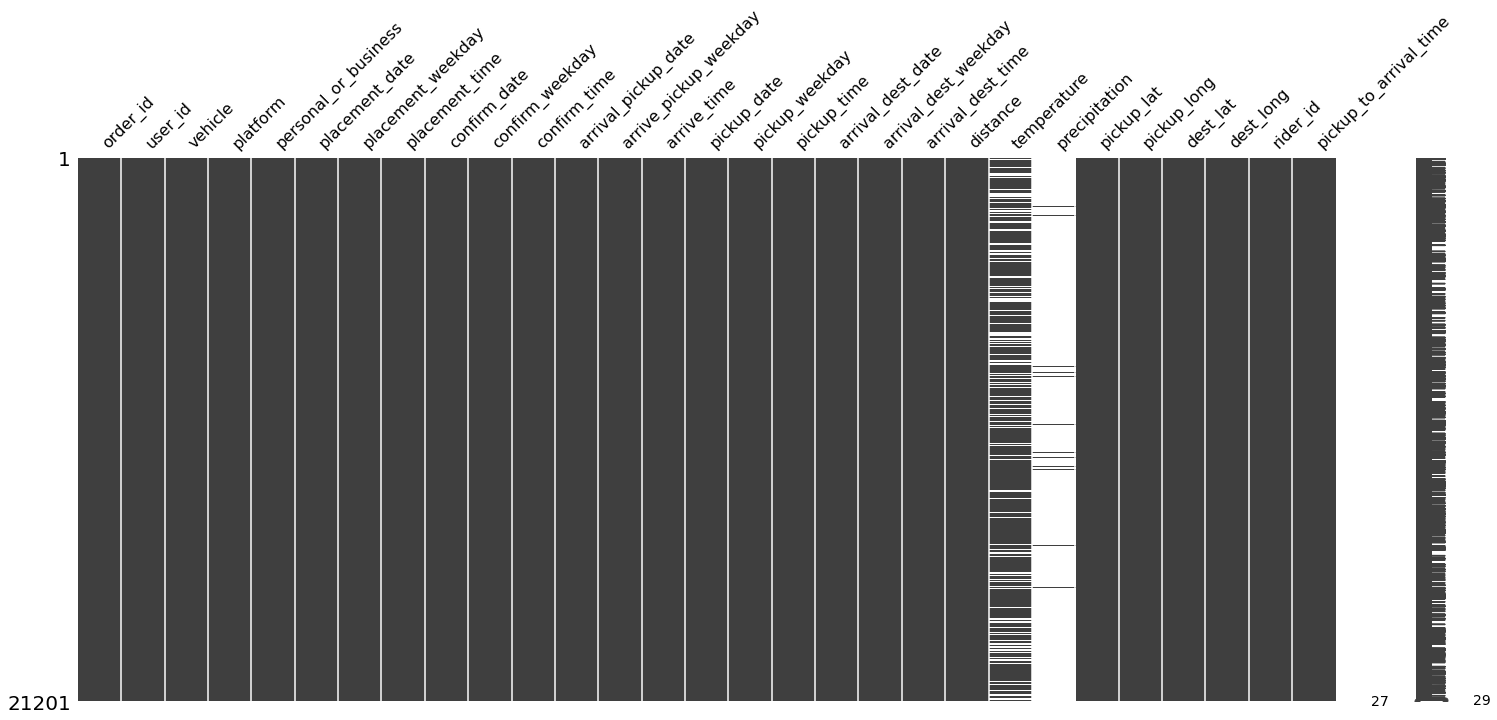

In [9]:
msno.matrix(train)

In [10]:
# Drop precipitation
train.drop(columns="precipitation", inplace=True)

In [11]:
# Drop vehicle because they are all 'Bike'
train.drop(columns="vehicle", inplace=True)

In [12]:
# Fill missing data in temperature with the mean
train.temperature.fillna(train.temperature.mean(), inplace=True)

In [13]:
train.dtypes

order_id                     int64
user_id                      int64
platform                  category
personal_or_business      category
placement_date               int64
placement_weekday            int64
placement_time              object
confirm_date                 int64
confirm_weekday              int64
confirm_time                object
arrival_pickup_date          int64
arrive_pickup_weekday        int64
arrive_time                 object
pickup_date                  int64
pickup_weekday               int64
pickup_time                 object
arrival_dest_date            int64
arrival_dest_weekday         int64
arrival_dest_time           object
distance                     int64
temperature                float64
pickup_lat                 float64
pickup_long                float64
dest_lat                   float64
dest_long                  float64
rider_id                     int64
pickup_to_arrival_time       int64
dtype: object

In [14]:
correl = train.corr()
correl

,order_id,user_id,placement_date,placement_weekday,confirm_date,confirm_weekday,arrival_pickup_date,arrive_pickup_weekday,pickup_date,pickup_weekday,arrival_dest_date,arrival_dest_weekday,distance,temperature,pickup_lat,pickup_long,dest_lat,dest_long,rider_id,pickup_to_arrival_time
order_id,1.000000,-0.015921,-0.001698,-0.013336,-0.001719,-0.013456,-0.001719,-0.013456,-0.001719,-0.013456,-0.001719,-0.013456,0.001802,0.003955,-0.012558,0.003814,0.004146,0.000053,-0.004334,-0.013171
user_id,-0.015921,1.000000,-0.016579,0.002528,-0.016576,0.002549,-0.016576,0.002549,-0.016576,0.002549,-0.016576,0.002549,-0.006908,-0.006268,0.121854,-0.046961,0.053308,0.000454,0.008612,0.018138
placement_date,-0.001698,-0.016579,1.000000,0.026148,0.999998,0.026122,0.999998,0.026122,0.999998,0.026122,0.999998,0.026122,-0.007585,0.011605,-0.004929,-0.005453,0.007541,0.002077,-0.010908,-0.014710
placement_weekday,-0.013336,0.002528,0.026148,1.000000,0.026132,0.999952,0.026132,0.999952,0.026132,0.999952,0.026132,0.999952,0.003582,0.027703,-0.000918,0.011008,-0.004299,-0.000875,-0.007403,0.009693
confirm_date,-0.001719,-0.016576,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.011606,-0.004923,-0.005448,0.007550,0.002073,-0.010907,-0.014701
confirm_weekday,-0.013456,0.002549,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.003574,0.027712,-0.000883,0.011036,-0.004251,-0.000900,-0.007401,0.009744
arrival_pickup_date,-0.001719,-0.016576,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.011606,-0.004923,-0.005448,0.007550,0.002073,-0.010907,-0.014701
arrive_pickup_weekday,-0.013456,0.002549,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.003574,0.027712,-0.000883,0.011036,-0.004251,-0.000900,-0.007401,0.009744
pickup_date,-0.001719,-0.016576,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.011606,-0.004923,-0.005448,0.007550,0.002073,-0.010907,-0.014701
pickup_weekday,-0.013456,0.002549,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.003574,0.027712,-0.000883,0.011036,-0.004251,-0.000900,-0.007401,0.009744


In [15]:
# Convert correlation coefficients to categories
def to_str_correl(coeff):
    if coeff <= -0.7:
        return "strong neg"
    elif coeff <= -0.4:
        return "moderate neg"
    elif coeff < 0.4:
        return "weak"
    elif coeff < 0.7:
        return "moderate pos"
    else:
        return "strong pos"
    
correl = correl.applymap(to_str_correl)

In [16]:
# Listing strong correlation variables
for column in correl.columns:
    for index in correl[column].index:
        if (column != index) and ("strong" in correl.loc[index, column]):
            print(column + " & " + index + " : " + correl.loc[index, column])

placement_date & confirm_date : strong pos
placement_date & arrival_pickup_date : strong pos
placement_date & pickup_date : strong pos
placement_date & arrival_dest_date : strong pos
placement_weekday & confirm_weekday : strong pos
placement_weekday & arrive_pickup_weekday : strong pos
placement_weekday & pickup_weekday : strong pos
placement_weekday & arrival_dest_weekday : strong pos
confirm_date & placement_date : strong pos
confirm_date & arrival_pickup_date : strong pos
confirm_date & pickup_date : strong pos
confirm_date & arrival_dest_date : strong pos
confirm_weekday & placement_weekday : strong pos
confirm_weekday & arrive_pickup_weekday : strong pos
confirm_weekday & pickup_weekday : strong pos
confirm_weekday & arrival_dest_weekday : strong pos
arrival_pickup_date & placement_date : strong pos
arrival_pickup_date & confirm_date : strong pos
arrival_pickup_date & pickup_date : strong pos
arrival_pickup_date & arrival_dest_date : strong pos
arrive_pickup_weekday & placement_we

<AxesSubplot:xlabel='platform', ylabel='pickup_to_arrival_time'>

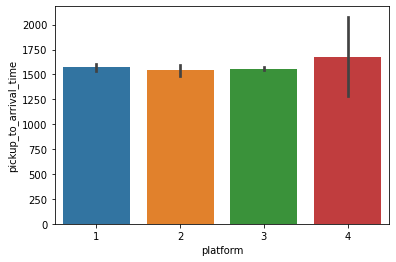

In [17]:
sns.barplot(x="platform", y="pickup_to_arrival_time", data=train)

In [18]:
def convert_time(time):
    #time is in the form "XX:XX:XX AM/PM" or "X:XX:XX AM/PM". Convert it to a seconds format.
    #for example, "1:00:00 AM" is converted to 3600. "1:00:00 PM" is converted to 46800.
    
    time_one_twelve = time[:-3] 
    if time_one_twelve[1] == ":":
        time_one_twelve = "0" + time_one_twelve[:]
        print(time_one_twelve)
    #this is the part consisting of "XX:XX:XX"
    
    ampm = time[-2:] #this is the part consisting of "AM/PM"
    
    if ampm == 'AM':
        return convert_am_time(time_one_twelve)
    elif ampm == 'PM':
        return convert_am_time(time_one_twelve) + 3600 * 12
    else:
        return -1 #this should never happen when your input is valid, it's to deal with naughty inputs

In [19]:
def convert_am_time(time_one_twelve):
    hour_string = time_one_twelve[:2]
    minute_string = time_one_twelve[3:5]
    second_string = time_one_twelve[6:8]
    
    hour_int = convert_str_to_int(hour_string)
    minute_int = convert_str_to_int(minute_string)
    second_int = convert_str_to_int(second_string)
    
    return 3600 * hour_int + 60 * minute_int + second_int

In [20]:
def convert_str_to_int(string):
    # Precondition: string has length 2 and should only consist of digits
    if string[0] == "0":
        return int(string[1])
    else:
        if string == "12":
            return 0
        return int(string)

In [21]:
train['placement_time'] = train.apply(lambda x: convert_time(x.placement_time), axis=1)
train['confirm_time'] = train.apply(lambda x: convert_time(x.confirm_time), axis=1)
train['pickup_time'] = train.apply(lambda x: convert_time(x.pickup_time), axis=1)
train['arrive_time'] = train.apply(lambda x: convert_time(x.arrive_time), axis=1)
train['arrival_dest_time'] = train.apply(lambda x: convert_time(x.arrival_dest_time), axis=1)

09:35:46
09:25:34
09:55:18
03:07:35
09:33:45
02:13:01
04:48:54
09:23:37
03:43:20
02:37:42
09:12:08
09:12:10
02:12:53
07:27:32
03:38:33
02:42:27
01:53:26
08:33:07
03:26:29
09:04:19
04:08:47
04:17:07
02:42:33
05:01:08
01:17:29
04:01:21
08:35:04
01:59:23
04:57:28
01:15:54
02:11:49
02:22:29
03:09:20
04:16:05
09:40:58
01:07:06
01:05:35
09:45:43
09:43:01
05:40:32
02:29:26
05:35:02
01:00:14
01:32:46
03:42:01
09:27:36
03:34:03
01:49:56
09:45:36
01:00:31
03:10:47
01:54:12
03:10:32
03:20:54
03:18:01
09:13:15
06:52:38
03:37:08
08:35:26
04:56:04
09:15:37
02:49:57
07:53:59
02:35:20
01:47:49
02:25:06
09:26:03
04:28:27
03:48:20
07:41:14
02:08:28
09:46:36
01:07:39
02:43:20
02:44:14
04:41:24
01:13:04
05:07:12
09:51:59
01:48:17
04:37:18
02:07:07
03:46:52
02:48:26
09:59:36
03:09:05
01:34:54
04:22:55
03:28:23
05:28:38
01:32:36
03:32:59
02:12:53
07:58:13
04:02:44
09:00:15
04:16:47
01:37:18
01:23:37
02:59:48
05:23:31
03:19:10
06:26:07
01:55:21
04:23:34
01:47:58
02:47:02
01:32:49
09:36:53
09:22:26
01:55:24
0

02:17:56
03:10:16
02:43:04
05:50:52
07:19:10
02:44:29
04:00:55
01:36:22
03:23:26
07:54:58
02:55:27
03:30:32
02:24:57
09:18:07
06:37:15
09:46:57
02:58:27
02:01:15
02:38:19
01:57:51
09:20:24
04:25:36
03:23:24
03:27:59
02:39:32
03:25:35
09:52:59
04:45:34
03:59:35
05:00:54
03:24:47
04:37:14
09:12:30
02:44:13
02:58:22
02:48:17
09:54:59
01:08:57
04:17:20
09:16:31
07:34:45
09:33:40
04:40:13
07:43:48
02:22:08
09:46:40
04:13:39
02:44:24
02:07:20
03:55:00
09:29:32
03:23:19
01:46:48
02:13:57
01:53:51
01:33:12
09:56:09
03:51:01
01:07:20
02:51:48
01:24:05
04:36:44
01:30:36
08:30:24
03:59:05
05:50:11
09:11:21
02:20:27
02:32:00
01:15:37
09:36:19
08:46:05
02:39:54
09:49:49
09:15:59
03:09:27
08:25:34
05:11:36
09:19:07
04:34:22
09:46:21
05:16:51
02:59:21
08:43:27
09:24:54
08:54:39
05:19:44
01:39:44
03:42:46
02:20:26
04:09:33
09:47:16
03:46:19
04:10:39
09:23:29
04:00:44
09:54:48
05:00:23
02:54:19
05:19:23
09:28:59
08:14:11
03:52:35
02:10:54
03:02:30
08:22:50
02:59:14
01:25:21
02:27:01
04:05:36
08:17:41
0

09:33:17
02:46:37
09:59:36
02:07:07
03:34:48
02:04:37
02:34:54
03:45:20
01:27:53
01:59:39
03:59:34
04:29:38
03:50:37
01:05:45
04:45:05
09:03:56
02:20:16
01:06:52
01:30:08
06:29:40
02:31:45
01:13:50
01:59:24
03:00:43
03:20:02
02:25:11
01:10:05
03:58:49
09:18:12
05:59:09
03:11:16
08:49:11
09:37:06
05:50:28
08:46:07
03:06:38
03:36:18
03:36:47
01:34:41
03:51:26
09:43:50
05:12:19
07:39:07
09:46:25
02:41:12
03:29:14
02:22:39
02:09:17
01:41:52
04:14:51
01:35:21
03:42:27
09:30:41
09:51:14
09:29:10
08:33:12
04:13:53
02:33:11
02:10:14
09:53:19
03:00:28
03:31:54
03:38:49
01:01:36
09:00:58
03:25:24
08:59:06
03:16:40
01:24:23
03:32:57
02:51:43
08:37:15
09:37:23
01:49:07
02:03:02
09:53:40
01:03:25
02:33:01
03:25:07
05:01:20
02:38:52
02:47:36
09:42:57
01:37:41
03:30:53
03:13:44
08:19:10
03:53:40
03:31:22
01:46:32
01:20:11
02:53:04
09:26:05
08:45:26
02:59:11
08:44:42
07:57:43
03:54:05
02:32:20
01:43:32
03:25:15
03:02:54
04:43:38
01:10:03
04:15:27
03:27:39
08:15:02
01:18:45
04:18:02
09:47:14
09:27:48
0

05:09:17
03:47:28
02:35:56
08:56:47
09:49:22
04:20:11
01:37:21
02:45:16
09:54:45
02:07:19
07:32:28
05:06:55
09:23:55
08:37:57
02:14:31
04:28:22
02:41:03
02:32:59
04:11:53
03:48:28
04:16:11
09:15:30
09:11:44
01:26:28
02:54:04
03:05:52
04:00:02
03:49:43
09:27:26
09:37:34
03:02:07
09:09:02
09:41:11
09:01:12
03:37:20
09:14:00
03:53:02
01:44:10
01:44:26
01:09:51
05:18:28
04:36:07
04:19:54
01:37:29
05:08:50
06:32:04
01:18:41
01:34:47
01:37:33
05:05:45
02:25:02
03:43:55
05:59:25
04:38:00
03:11:32
01:15:11
09:07:01
04:24:08
02:49:54
02:56:07
01:15:29
03:42:13
02:32:30
07:15:33
02:40:18
01:02:43
03:56:53
02:34:53
01:02:06
02:14:00
09:58:01
01:18:58
02:01:32
02:20:54
09:11:17
02:01:43
01:56:11
05:38:44
03:03:01
08:58:56
03:09:09
03:11:34
02:08:25
09:08:42
04:06:27
01:33:58
09:56:18
04:01:54
03:30:34
03:44:49
09:32:21
05:14:00
02:33:27
05:01:34
02:51:48
02:36:14
09:40:28
05:42:15
02:37:42
03:40:11
05:20:25
08:36:08
03:55:47
08:52:03
01:38:32
01:45:02
01:23:05
04:00:00
08:26:40
04:06:51
01:48:49
0

04:19:48
02:53:04
09:39:26
05:32:01
05:09:33
02:16:20
08:49:05
01:19:42
03:51:10
02:37:29
09:12:14
01:21:36
02:16:16
09:37:19
09:20:15
03:37:56
03:30:15
04:22:37
01:44:32
01:37:21
06:28:00
02:56:45
01:24:25
01:05:05
08:42:54
02:06:36
03:24:23
04:13:34
03:19:44
02:49:40
02:31:58
03:35:58
01:36:52
02:17:05
08:33:12
03:28:08
02:46:41
04:30:04
02:39:54
08:50:47
01:15:26
02:41:59
04:14:17
09:54:33
01:20:08
07:37:20
01:32:54
08:50:28
04:03:22
09:32:31
05:13:46
01:20:30
02:54:55
02:46:32
02:51:20
03:32:07
01:35:49
02:55:30
02:46:10
03:42:50
09:33:34
08:44:45
07:42:28
03:47:18
04:03:49
01:31:15
02:29:55
09:09:49
04:46:26
01:41:13
09:13:55
04:15:10
01:42:24
03:46:41
03:00:43
02:02:19
09:45:55
07:56:32
05:37:21
01:53:30
01:54:39
01:17:16
04:02:39
03:03:08
09:05:53
01:59:59
09:00:10
03:25:08
04:59:56
01:30:24
03:01:19
04:35:06
02:00:36
04:07:14
01:03:05
03:38:34
02:46:06
08:39:13
02:04:52
02:12:02
02:35:00
09:24:09
02:57:22
02:59:33
01:14:29
08:41:23
03:13:41
03:11:48
09:37:40
02:25:36
03:22:13
0

09:15:31
01:05:30
04:38:08
02:16:53
02:30:43
08:47:07
09:41:47
09:50:58
09:09:46
02:39:57
03:34:51
04:28:00
01:17:34
03:40:46
03:21:47
09:34:59
09:50:41
04:02:56
03:30:43
02:30:50
02:27:37
03:48:08
09:28:58
04:35:04
03:52:21
03:58:35
02:35:09
02:53:54
09:35:05
04:03:31
06:46:58
05:26:43
04:09:44
06:37:09
08:52:12
03:41:57
01:08:41
04:27:09
03:08:43
03:06:03
09:03:40
03:12:26
08:16:29
01:12:29
04:36:01
02:23:52
08:37:14
03:44:19
09:54:13
02:29:20
04:29:32
03:17:05
08:40:52
02:16:03
02:58:12
04:22:34
09:57:14
02:36:18
03:29:11
01:52:27
09:39:44
08:18:21
08:32:30
03:58:57
02:55:07
09:31:50
09:47:41
09:18:37
09:47:22
09:04:51
01:53:05
03:16:26
03:19:05
01:14:53
02:41:48
02:36:14
03:01:22
03:08:19
03:50:47
08:55:42
09:54:45
01:41:56
04:43:00
01:00:47
07:27:08
01:17:56
03:13:12
02:37:40
03:56:11
09:18:59
01:22:49
04:31:20
02:50:22
02:22:37
02:06:19
02:10:51
02:14:57
07:55:44
03:45:51
02:07:18
09:52:13
02:25:00
04:03:19
04:20:33
09:15:33
09:51:32
01:49:15
09:39:54
02:34:48
09:56:20
02:02:48
0

02:47:17
02:11:30
08:55:58
03:11:34
04:29:27
09:32:30
09:16:44
05:05:13
04:01:30
02:01:10
01:22:04
08:05:48
03:41:55
03:18:26
02:20:16
02:45:58
03:41:44
01:20:38
02:19:23
09:06:48
09:54:01
09:06:44
05:24:54
03:03:15
09:21:25
04:02:43
03:01:44
03:09:16
08:19:27
01:09:42
03:22:10
04:44:51
01:45:30
03:33:40
03:58:25
04:10:26
01:01:35
01:16:16
01:22:07
03:11:09
05:48:39
06:36:05
09:16:35
02:03:54
01:41:00
02:29:48
09:40:02
07:47:33
05:13:27
03:16:41
04:51:28
01:25:38
01:44:17
03:10:33
09:07:27
09:28:20
02:44:09
09:19:47
03:35:43
06:01:43
01:49:26
04:41:17
03:33:12
01:52:11
03:37:01
05:31:14
09:59:57
04:10:51
04:59:05
03:35:45
03:52:58
03:31:43
04:06:15
02:30:40
09:43:26
03:41:51
02:36:30
01:32:22
02:46:25
01:35:01
09:57:31
02:30:55
01:52:57
01:18:21
03:17:20
02:51:10
03:52:27
04:21:09
05:28:35
02:17:24
02:55:19
04:36:27
05:30:30
02:00:33
01:15:02
09:35:22
01:45:36
02:26:14
02:15:31
06:26:05
03:03:35
01:20:55
09:51:29
02:22:18
02:17:03
07:49:55
01:06:01
09:46:15
03:12:29
08:08:56
09:16:16
0

01:49:54
02:09:55
04:56:16
01:16:28
09:09:49
02:30:42
08:52:41
09:46:33
01:31:25
03:05:28
01:46:30
01:34:33
03:37:18
03:07:32
01:57:30
04:35:32
01:22:21
01:58:17
03:15:42
09:20:31
01:16:23
04:40:23
01:04:59
09:21:53
03:46:25
02:44:03
03:54:45
02:09:51
09:59:48
04:03:34
01:50:37
03:17:09
08:57:04
02:24:11
01:56:13
01:19:25
01:18:56
08:34:15
07:38:05
09:24:41
03:15:59
02:16:43
02:14:30
02:00:45
03:51:27
05:28:46
02:36:09
04:07:01
04:45:25
03:37:13
01:56:11
08:35:03
09:18:09
02:36:21
01:39:23
08:45:18
02:28:00
03:39:00
03:53:00
03:08:26
02:42:32
09:16:43
01:59:04
02:03:34
01:12:02
03:18:05
03:10:41
03:40:13
03:24:30
02:08:55
03:00:29
04:06:26
09:19:45
08:26:17
03:12:30
02:58:47
08:31:37
06:06:33
02:05:54
03:26:16
09:19:03
02:59:52
03:12:12
02:59:12
03:30:35
03:19:38
01:30:33
08:36:01
09:56:44
03:52:09
01:29:55
09:45:05
02:55:07
02:41:21
09:50:42
09:22:48
01:25:41
08:30:40
02:29:18
09:22:49
02:11:18
01:25:28
01:22:51
03:24:07
03:17:00
01:49:04
03:45:43
03:00:28
01:00:53
02:48:56
03:52:46
0

02:25:53
04:00:05
03:30:56
08:56:18
09:15:49
01:03:21
01:46:59
03:25:35
09:46:34
03:23:29
02:42:43
09:24:01
02:09:49
09:14:28
01:13:39
05:49:08
03:41:04
03:36:58
02:55:21
09:25:52
09:01:39
03:16:51
04:11:40
03:54:32
03:17:31
03:59:54
04:43:47
02:45:45
08:38:40
01:15:27
04:37:38
03:53:03
06:01:48
02:50:58
03:16:10
08:35:39
03:33:53
02:36:26
02:03:20
04:15:41
09:12:57
03:52:22
06:22:09
03:18:43
04:06:08
02:06:40
03:59:13
09:41:38
03:43:49
02:09:16
03:12:11
08:55:48
03:47:20
01:23:30
03:52:59
04:03:37
03:24:48
07:49:23
01:57:14
01:53:01
03:07:23
04:49:13
03:50:05
03:34:00
01:47:21
02:57:49
03:46:14
09:00:33
09:13:21
04:27:38
01:01:35
02:18:57
09:29:58
01:12:11
02:02:39
03:49:46
09:04:36
01:18:49
02:16:50
03:20:35
03:49:07
08:42:29
04:13:15
05:39:18
01:26:54
02:32:19
02:00:09
07:27:03
03:38:17
02:05:19
09:24:01
02:21:23
08:51:46
03:12:35
01:21:31
02:47:26
01:37:48
08:51:38
04:06:54
01:08:46
02:54:32
04:10:02
04:48:29
02:28:16
04:34:50
08:33:51
01:28:02
08:31:33
04:27:34
03:27:18
01:28:43
0

04:03:10
09:25:36
01:06:45
03:22:23
03:49:24
04:32:48
05:19:13
02:31:04
08:49:47
03:40:44
04:35:08
04:11:39
04:18:29
03:45:01
02:24:08
09:34:43
05:53:38
09:09:14
03:08:13
02:27:06
02:26:04
09:36:33
08:59:08
03:37:32
07:52:33
08:57:58
05:22:51
05:12:39
03:22:34
01:07:16
03:33:15
03:37:04
09:22:34
04:17:35
04:34:10
03:06:37
02:59:02
01:22:17
06:38:10
03:39:11
04:29:27
01:35:18
03:31:40
09:15:13
09:36:34
09:45:51
04:31:43
01:06:30
09:06:16
01:19:38
04:30:13
02:19:08
06:51:07
03:30:38
09:56:24
03:42:22
09:12:29
02:02:44
08:06:04
02:18:33
04:07:54
01:37:51
01:23:39
01:59:24
01:00:57
04:39:47
03:01:58
03:40:16
03:14:49
03:03:21
08:50:33
01:15:40
02:33:11
03:47:05
02:29:29
03:06:50
02:21:59
02:39:36
02:12:57
03:34:59
02:43:32
05:04:18
05:03:46
03:41:42
04:04:41
02:29:38
08:19:19
02:05:51
08:02:01
09:01:02
01:14:10
09:08:16
09:08:21
02:32:24
09:55:51
03:32:13
01:31:39
03:52:15
02:45:45
09:42:13
03:07:51
08:17:16
03:33:16
09:57:01
02:44:36
02:25:44
03:25:25
03:49:41
09:59:27
02:38:31
04:39:34
0

01:15:51
04:43:37
03:14:38
01:15:11
09:08:01
01:04:57
03:07:01
02:50:43
09:28:07
04:53:34
03:11:37
01:54:31
02:10:05
01:41:56
02:17:05
02:26:53
03:23:40
03:47:27
02:59:15
03:35:55
06:37:45
01:39:52
09:22:07
02:41:58
02:18:28
04:18:34
08:40:32
04:20:40
04:06:58
02:43:01
09:26:46
03:01:41
01:42:03
08:45:54
09:56:10
02:10:35
07:23:48
09:00:27
08:47:23
09:37:47
08:11:55
03:19:22
09:06:30
04:00:03
01:48:00
07:39:40
09:42:21
02:26:03
09:09:55
03:49:18
09:07:47
02:51:25
02:02:42
09:42:14
01:36:21
05:47:30
02:47:38
09:27:33
01:58:34
04:44:41
09:38:17
07:58:58
05:04:05
02:56:23
02:23:34
01:25:54
02:54:55
09:58:06
03:40:40
01:45:24
04:08:21
09:58:00
08:09:45
01:00:55
03:49:35
02:16:57
03:36:11
04:33:31
04:23:36
03:13:09
05:25:57
03:04:18
02:14:37
02:59:01
09:43:24
04:07:08
09:17:58
07:49:20
08:44:57
02:21:14
05:13:26
01:27:16
09:52:41
02:53:15
01:39:43
06:06:52
09:57:59
02:17:36
01:14:54
04:29:19
02:27:17
02:07:23
09:07:22
01:13:32
03:12:05
06:04:48
08:02:35
02:52:48
09:30:43
03:34:03
08:55:17
0

01:03:43
09:07:35
02:30:10
08:12:14
09:45:58
01:37:32
04:59:29
01:01:42
06:00:05
04:08:34
02:54:09
03:02:13
02:42:37
09:01:39
04:11:45
02:51:10
03:33:33
09:41:53
05:33:13
01:55:44
01:12:16
05:08:54
08:25:08
01:44:17
02:54:08
02:40:14
02:28:17
04:50:05
09:50:14
03:41:19
03:33:58
02:53:59
05:22:36
01:26:20
04:27:06
05:11:57
05:31:28
01:32:09
07:56:53
03:45:28
02:07:15
06:57:10
05:05:12
01:46:51
02:47:12
01:57:09
03:32:03
02:53:56
02:08:11
03:57:28
03:18:53
02:32:17
01:05:23
07:49:49
04:49:30
02:34:16
07:30:23
05:06:19
03:25:51
09:35:23
02:52:02
02:28:59
09:19:12
03:47:44
09:17:31
03:46:05
09:31:01
09:52:25
01:53:24
03:23:05
09:55:02
09:28:59
04:07:30
04:07:21
01:29:40
02:14:07
09:53:29
02:53:12
02:10:53
08:50:18
02:44:14
01:55:36
02:38:01
05:51:24
04:12:06
01:29:27
01:56:21
02:14:36
09:16:07
02:18:21
03:53:03
04:30:30
02:41:16
09:16:05
08:54:55
03:37:57
02:31:37
08:37:11
04:25:37
08:58:28
09:42:54
02:10:09
09:03:28
02:54:35
05:36:37
02:03:41
04:06:04
02:12:49
01:33:27
09:01:12
02:18:29
0

03:21:18
03:20:14
01:04:29
03:47:08
09:07:20
02:54:11
05:49:32
05:50:18
04:21:15
09:42:01
09:21:09
09:31:09
03:30:42
03:11:04
09:06:09
02:32:51
04:14:07
04:39:37
03:09:40
09:30:50
01:08:58
02:47:27
03:10:53
09:16:31
03:18:12
02:18:04
03:56:24
03:39:49
02:39:47
01:27:10
01:17:24
09:07:51
03:27:51
09:59:47
05:34:39
04:19:46
04:46:18
03:32:30
04:32:51
05:15:10
08:28:24
08:56:30
02:30:03
04:55:06
04:05:18
03:39:14
05:18:54
01:04:27
03:50:49
08:51:20
09:09:58
01:06:39
02:18:37
02:18:02
03:04:15
09:54:40
02:09:46
01:01:17
01:28:45
09:03:59
04:03:51
01:30:25
09:26:33
01:08:34
03:28:00
03:12:13
02:04:16
02:31:58
03:45:54
06:05:08
03:58:07
01:06:40
03:18:09
01:14:02
02:53:23
09:45:48
08:47:44
04:49:09
02:22:52
09:48:41
02:20:22
03:58:31
09:25:46
01:13:56
02:07:42
09:47:57
02:50:45
01:17:48
03:31:28
05:55:53
02:56:42
09:43:05
02:24:34
09:33:30
09:33:21
04:15:30
01:29:26
09:56:52
04:28:22
01:15:01
05:26:19
01:01:32
03:17:46
09:34:39
08:36:33
08:24:24
09:38:01
06:02:14
05:48:29
05:10:03
02:40:44
0

02:31:29
06:55:04
08:33:06
02:43:30
09:23:38
03:01:13
02:27:41
02:28:45
07:02:01
03:29:54
02:34:33
02:52:37
01:05:03
02:58:40
09:48:01
03:00:46
01:14:36
01:26:15
02:52:33
01:17:23
09:26:51
04:33:30
03:40:18
03:54:08
02:14:10
09:41:12
04:39:23
02:14:34
04:01:49
08:23:58
09:20:40
02:25:42
02:57:40
09:14:47
02:57:48
02:49:04
01:45:20
02:08:17
08:48:53
01:27:27
04:57:49
01:22:06
08:06:59
07:44:10
09:35:29
05:40:18
02:08:59
03:55:22
04:42:44
02:45:24
04:02:06
02:54:52
02:41:15
04:20:18
03:30:32
01:13:26
02:57:20
04:04:53
07:07:48
02:56:19
02:33:52
01:39:58
09:29:11
03:53:53
04:58:58
05:13:18
07:32:53
09:26:29
03:13:12
02:35:46
01:17:51
03:22:28
09:58:02
02:22:11
01:06:01
01:26:26
09:02:34
01:48:53
01:13:07
05:21:13
04:06:12
03:03:04
03:16:19
01:31:21
06:09:39
01:41:11
03:41:56
04:14:10
03:24:21
03:41:06
04:20:21
08:56:25
09:01:41
04:26:42
03:41:59
01:42:11
03:29:06
02:58:06
08:58:51
03:20:24
02:13:52
05:36:57
09:34:01
03:30:39
06:41:56
02:44:42
06:44:35
01:22:50
01:34:04
05:09:36
03:29:41
0

01:21:56
03:51:36
02:37:47
09:12:46
01:21:43
02:16:50
09:20:25
03:48:35
03:31:19
04:56:23
01:45:25
01:09:24
01:37:48
06:28:24
02:57:27
01:48:31
01:06:48
08:47:34
02:10:09
03:28:23
04:21:22
03:21:37
02:51:03
02:37:12
03:37:03
01:41:11
02:18:26
08:33:38
03:32:29
02:47:15
04:45:24
02:43:59
08:51:35
01:15:53
02:42:10
04:18:15
09:54:57
01:39:04
08:41:41
01:38:25
08:50:34
04:04:09
09:32:52
05:14:13
01:21:22
02:55:10
02:46:50
02:57:25
03:33:44
01:36:05
03:08:32
03:20:23
03:43:04
09:35:00
01:14:31
09:04:06
08:10:29
03:50:03
04:05:09
01:31:37
02:29:55
09:15:14
04:47:38
02:20:24
09:15:05
04:16:39
01:43:14
03:48:16
03:01:07
02:02:53
07:57:18
05:41:38
01:55:17
01:54:59
01:17:33
04:02:55
03:03:32
09:10:05
02:01:55
09:01:34
03:25:56
05:00:42
01:31:48
03:02:06
04:36:00
02:00:43
04:13:03
01:03:15
03:38:46
02:46:46
08:42:37
02:05:00
02:12:18
02:37:46
09:25:09
02:57:35
03:03:19
01:34:13
03:14:15
03:12:10
09:41:38
02:26:49
03:22:41
08:37:28
02:36:43
01:13:29
02:21:18
07:47:29
09:14:24
02:23:48
05:32:05
0

02:30:51
08:47:41
09:42:05
09:51:54
09:10:26
02:40:53
03:36:14
04:35:19
01:17:55
03:56:31
03:22:18
09:35:10
09:51:29
04:05:02
03:31:06
02:30:56
02:28:27
03:49:00
09:30:40
04:35:20
03:53:23
04:14:42
02:35:28
02:54:18
09:44:19
04:07:45
06:47:10
05:27:01
04:09:48
06:58:34
08:53:23
03:42:49
01:09:00
04:28:23
03:13:23
03:06:55
09:03:53
03:16:57
08:16:39
01:13:01
04:36:01
02:32:33
08:38:03
03:53:53
09:54:34
02:34:18
04:39:02
03:18:27
08:44:55
02:17:19
03:00:02
04:27:25
09:57:45
02:37:57
03:33:31
01:52:58
09:40:17
08:53:39
08:32:38
04:15:01
03:01:45
09:47:52
09:20:01
09:47:51
09:05:06
01:53:16
03:17:13
03:19:23
01:42:22
01:18:09
02:46:01
02:43:11
03:03:25
03:09:45
03:51:00
08:55:59
09:55:57
01:49:31
04:44:57
01:01:39
09:01:31
01:18:27
03:14:43
02:41:06
03:57:18
09:19:42
01:23:18
04:31:45
02:53:46
02:22:50
02:08:35
02:12:55
02:25:59
01:24:20
07:56:05
03:48:08
02:23:40
02:25:16
01:02:28
04:03:39
04:24:40
09:15:41
09:52:42
02:13:36
09:40:31
02:34:54
02:03:09
01:54:42
01:40:40
01:04:52
04:33:11
0

02:43:42
08:20:30
08:56:40
03:07:50
02:54:42
09:20:51
09:04:40
09:17:04
01:22:12
02:04:39
09:40:59
02:34:24
01:14:42
04:07:12
04:41:05
03:36:26
02:25:54
01:19:57
02:52:32
04:17:20
09:26:17
03:23:34
08:33:59
01:37:43
08:52:49
03:17:00
01:03:41
09:57:41
05:54:12
05:03:55
04:55:03
03:36:17
02:28:50
02:10:22
02:48:52
03:30:25
09:27:40
02:47:02
04:29:32
08:50:16
02:12:08
03:00:15
02:07:48
05:17:33
02:35:33
02:46:12
02:30:39
09:57:54
08:47:58
04:23:52
01:49:34
03:37:35
02:23:08
01:22:12
03:54:49
01:03:26
05:54:37
04:24:41
09:06:23
09:22:09
01:00:50
01:39:30
03:35:34
04:55:01
02:28:59
02:33:37
04:12:54
04:05:18
01:12:48
09:45:52
03:46:32
09:22:37
06:23:10
03:50:46
09:47:31
03:04:56
01:23:25
09:59:37
08:41:30
02:29:25
01:17:44
01:45:20
01:37:22
02:43:23
03:16:15
09:32:50
04:13:08
02:09:04
03:49:54
01:00:15
01:30:04
03:41:06
01:01:31
08:55:55
04:10:50
05:28:43
01:49:38
02:54:32
09:58:15
03:22:32
03:29:41
04:01:26
03:20:05
03:40:52
09:42:37
04:48:35
02:50:49
02:35:11
09:13:52
03:12:04
04:30:22
0

09:45:59
04:02:56
04:16:32
03:32:01
09:27:58
09:37:08
04:11:03
02:59:56
01:53:01
08:17:23
02:17:34
03:18:30
08:54:53
01:13:02
04:32:51
03:13:44
09:17:37
08:50:40
01:00:18
01:46:47
01:08:43
01:06:21
05:01:08
09:41:08
01:17:23
08:49:42
01:07:05
03:36:01
08:33:39
05:14:59
01:16:28
02:32:09
02:31:31
02:57:47
04:28:34
01:43:13
09:50:53
04:13:00
01:11:16
09:12:19
03:55:03
03:01:40
02:24:10
01:02:58
01:31:49
09:50:19
04:44:51
03:44:34
07:23:41
02:55:51
04:18:29
01:32:54
04:07:25
03:16:23
09:11:51
01:49:56
03:55:24
01:19:34
03:14:13
03:45:42
02:22:40
05:33:33
05:34:11
01:51:55
03:24:05
09:09:06
07:45:34
01:19:36
03:29:59
09:10:44
03:33:33
04:15:25
03:53:22
09:33:54
04:06:47
01:10:42
02:13:37
07:16:21
01:07:41
02:12:23
01:05:40
02:33:40
05:39:51
08:56:20
09:46:39
01:17:22
01:56:28
02:09:51
03:16:56
02:35:37
01:54:35
01:10:28
02:51:37
02:53:14
09:39:03
02:32:00
01:04:36
09:48:19
01:02:31
09:53:26
01:23:11
01:48:16
01:28:30
01:50:16
09:56:11
03:08:41
03:09:07
09:19:07
01:08:01
03:08:21
02:10:31
0

09:28:20
04:00:48
03:22:46
03:55:45
04:21:20
02:12:48
09:17:15
09:55:35
01:45:24
08:51:19
02:36:28
04:55:34
08:55:37
07:03:16
04:03:48
02:18:46
09:09:15
01:04:39
03:15:17
04:19:10
01:39:23
01:20:42
02:56:39
03:24:37
02:42:58
03:21:10
02:22:20
04:11:00
03:07:33
04:04:35
04:10:38
04:22:18
05:43:12
02:15:42
02:29:10
08:30:48
01:07:02
01:43:37
06:24:03
01:53:06
05:11:37
01:48:17
02:34:41
09:28:34
04:13:03
02:41:00
01:22:47
03:16:26
01:04:58
05:54:38
01:05:34
04:05:58
02:46:16
04:22:58
02:58:10
09:34:59
03:36:50
01:34:42
01:05:17
08:52:03
02:31:32
02:48:10
03:51:32
02:44:00
04:51:56
08:30:00
09:26:10
03:23:59
01:09:57
03:33:53
04:04:21
07:59:53
09:05:41
04:29:10
01:35:35
06:40:36
04:35:11
04:11:46
02:39:00
02:42:36
04:18:38
08:52:13
04:36:37
02:22:03
09:12:27
08:55:54
04:34:37
01:58:13
01:28:07
09:25:29
03:50:35
09:43:06
03:34:28
09:47:11
02:18:46
01:20:13
03:08:26
02:31:52
09:41:55
01:08:14
04:59:59
02:03:44
01:43:00
01:17:21
03:03:36
09:12:55
01:15:18
04:49:19
02:57:40
04:22:01
04:44:07
0

02:21:30
01:26:05
02:42:04
03:43:46
02:50:42
02:52:20
02:30:21
02:52:52
05:05:59
02:27:23
02:26:53
01:09:43
03:56:44
03:38:01
01:00:13
04:47:27
03:11:20
01:47:08
06:25:16
03:57:48
06:43:45
09:27:58
01:44:31
01:46:10
03:58:53
01:03:09
08:32:08
01:58:41
02:27:36
02:36:23
03:51:25
02:15:38
09:34:33
01:37:04
01:15:45
09:45:45
07:39:52
04:47:42
05:28:12
02:18:25
07:51:18
02:16:59
04:12:16
03:53:58
01:05:14
02:04:53
02:01:23
09:01:26
04:10:30
01:49:25
09:22:12
02:22:17
02:04:12
08:28:06
08:07:13
01:49:25
03:12:18
01:57:57
09:18:01
01:58:39
05:11:21
08:39:52
03:46:32
02:27:09
09:45:49
03:51:49
03:29:17
09:42:23
02:33:43
04:46:23
02:35:46
01:10:49
04:09:18
09:42:42
03:31:20
09:40:05
08:48:33
01:41:12
09:10:25
09:49:54
01:49:51
08:50:37
02:43:52
05:08:11
07:09:11
01:37:44
03:44:25
03:08:04
01:40:31
08:39:33
02:37:25
04:52:18
04:46:44
04:39:35
02:56:32
02:00:20
01:26:30
02:42:04
09:26:47
02:04:19
01:25:27
04:55:47
01:17:51
02:38:50
01:56:07
09:32:54
03:43:41
09:33:24
02:01:03
01:15:52
02:49:43
0

02:40:14
03:51:10
04:34:03
04:03:32
01:53:28
03:45:13
02:54:28
09:19:21
02:35:20
03:47:43
01:18:38
02:40:41
09:06:16
02:39:23
05:58:51
02:24:26
04:59:06
03:16:55
02:47:28
03:40:47
01:00:41
04:48:03
02:27:46
02:53:52
03:45:55
04:24:24
03:25:31
02:17:30
02:16:39
01:42:12
01:28:18
05:07:56
05:17:20
03:52:51
01:11:40
01:36:12
02:18:12
04:01:58
02:28:17
04:34:33
08:53:21
02:40:34
03:25:06
09:54:16
02:50:51
05:06:20
04:51:34
03:41:36
09:42:41
03:33:58
03:27:37
02:34:05
03:23:40
05:45:50
03:01:06
09:58:48
02:49:37
03:57:37
09:00:28
01:26:12
04:40:58
03:44:15
06:24:47
05:55:48
05:58:08
01:48:12
04:42:46
04:23:16
01:38:14
04:54:20
02:33:47
03:24:01
08:45:43
06:58:20
09:53:58
05:17:29
04:25:45
04:35:02
01:04:27
03:02:22
01:39:58
02:02:27
06:01:43
04:10:22
04:17:28
09:57:09
04:37:43
08:56:41
04:58:17
02:50:10
01:21:19
01:30:22
05:16:38
05:01:19
05:23:48
04:26:07
02:36:10
07:23:26
03:34:01
01:28:24
03:31:26
04:15:16
08:02:57
02:24:15
08:52:08
01:51:42
04:28:25
05:11:08
09:52:03
04:11:22
02:32:57
0

04:15:47
09:07:55
03:03:15
01:33:01
09:41:42
01:45:28
01:08:02
02:29:04
03:42:57
04:08:38
04:11:40
02:09:09
06:32:45
03:48:46
03:12:23
01:46:37
08:58:12
02:12:04
05:23:59
09:54:59
01:21:08
01:35:12
01:31:35
03:40:55
01:37:40
03:42:17
01:22:04
05:41:11
08:59:06
01:34:56
04:23:03
04:54:56
04:26:09
04:11:59
02:35:08
02:42:24
02:42:15
01:55:49
08:37:27
01:37:08
01:23:03
01:34:02
09:45:29
06:10:06
03:25:22
09:13:49
04:08:26
06:29:06
01:01:15
09:45:48
08:15:25
02:31:06
09:44:38
03:05:08
02:42:17
02:58:33
02:42:19
01:08:09
02:00:35
09:57:44
05:18:38
06:30:03
01:55:31
09:44:16
05:12:36
08:56:17
01:09:41
01:03:13
09:59:09
03:12:56
06:36:30
02:42:03
03:20:56
01:28:14
09:20:16
04:58:51
03:58:46
09:05:34
01:55:08
01:42:43
03:37:26
03:57:43
03:01:02
08:59:29
02:06:49
01:05:58
01:39:06
04:20:04
09:40:42
02:58:57
03:39:15
02:22:30
01:48:32
04:27:34
07:05:05
03:16:10
09:37:07
02:06:17
02:22:41
03:32:19
09:46:55
09:18:20
09:58:40
01:46:32
03:58:42
02:59:19
05:25:57
02:41:36
03:09:57
03:47:18
01:28:46
0

03:52:44
02:09:32
08:17:30
01:58:54
02:14:45
02:30:18
04:07:38
03:03:37
03:28:37
04:47:25
03:51:34
01:01:48
05:29:13
02:17:25
01:12:40
04:05:31
03:25:54
09:50:19
03:57:53
01:10:10
09:32:16
02:47:51
04:21:24
03:53:31
02:32:01
03:09:06
01:09:35
05:18:02
03:00:01
09:44:01
01:25:12
09:29:12
04:05:51
09:19:11
05:08:54
04:45:39
09:51:47
02:40:06
05:03:45
01:07:56
04:10:47
09:56:37
04:12:11
01:25:57
02:39:01
03:20:13
09:24:20
03:56:55
06:01:00
01:01:01
09:05:23
08:26:06
01:36:12
03:47:42
03:22:09
02:50:42
02:47:52
06:26:56
03:34:17
02:05:28
04:05:22
07:26:48
09:09:23
03:36:28
01:22:05
01:01:21
02:52:15
01:52:53
01:25:53
09:33:22
02:26:17
04:14:29
02:47:04
03:35:05
02:27:24
04:09:11
05:55:34
09:00:11
03:44:45
03:22:34
03:31:43
09:51:33
01:36:36
03:22:44
01:10:43
02:00:09
08:39:29
03:34:58
03:25:57
01:50:08
02:29:16
01:17:34
04:23:58
06:55:09
02:39:27
04:29:23
03:46:36
04:23:49
04:01:58
02:39:46
08:06:42
01:19:14
02:43:43
09:43:52
08:01:08
01:35:02
02:49:05
02:10:43
01:37:48
04:11:14
02:15:55
0

01:25:32
02:39:55
09:59:46
03:48:50
01:44:17
01:55:24
03:04:52
02:49:05
05:04:07
09:18:09
02:41:54
02:10:26
02:29:06
05:02:18
02:26:36
03:43:10
03:21:46
03:34:45
01:28:12
06:11:15
02:18:50
01:17:34
01:38:07
04:35:44
02:25:02
04:19:55
03:19:32
08:56:11
06:52:37
03:12:40
02:28:02
04:36:56
09:35:19
01:22:30
04:48:17
06:50:42
04:27:10
05:28:39
04:49:36
01:16:49
04:57:21
01:40:52
03:22:43
09:25:56
03:37:33
05:07:37
03:23:48
05:35:54
02:29:37
04:19:32
02:20:51
06:09:46
04:19:22
03:01:35
06:09:44
02:08:17
03:52:55
02:12:33
01:02:19
04:14:49
09:24:04
03:41:37
02:20:02
01:31:05
03:39:38
01:51:59
04:28:17
04:16:26
08:49:33
01:57:41
03:13:07
04:42:49
02:23:18
03:53:27
08:06:15
02:04:39
03:07:11
01:56:16
05:12:35
03:21:20
05:10:02
04:03:28
04:24:05
01:08:38
01:51:06
02:16:53
09:43:51
09:30:42
09:40:54
04:34:54
06:31:13
02:41:52
01:15:02
02:18:56
03:55:25
04:42:47
01:59:11
03:12:56
01:33:13
04:48:42
01:19:41
09:43:47
01:00:23
01:50:55
03:19:01
01:17:03
04:05:49
04:39:19
01:34:35
09:27:48
01:40:05
0

03:07:59
01:22:14
03:58:45
03:16:04
01:41:33
01:53:49
03:05:31
01:04:52
02:02:18
09:34:11
04:46:58
03:54:08
04:31:07
02:37:04
09:57:35
05:06:10
01:14:51
02:39:17
04:25:46
09:18:03
09:52:44
02:49:12
03:18:48
09:26:48
03:14:29
03:38:59
01:17:52
02:27:45
02:51:43
08:54:58
01:49:53
01:01:51
05:09:57
01:38:29
08:24:35
01:27:41
08:03:15
09:56:32
06:12:55
02:58:24
03:57:39
05:04:27
03:01:06
04:25:18
03:06:30
03:55:01
04:36:37
03:40:28
01:49:25
03:19:02
01:21:18
04:44:05
07:33:09
03:12:35
01:25:06
02:59:22
01:57:49
09:45:55
04:07:18
05:27:23
05:30:48
07:52:49
09:44:51
03:37:02
01:11:11
02:49:31
02:34:50
04:57:11
02:38:52
01:24:47
01:50:54
09:23:12
01:21:32
02:23:50
01:46:47
05:39:12
04:30:13
03:41:30
03:42:43
02:06:30
01:02:22
06:29:25
01:59:56
03:54:59
04:39:47
03:49:27
04:44:16
04:39:49
09:03:27
01:46:55
09:29:45
04:28:54
01:23:05
03:50:52
02:21:40
03:43:23
03:11:41
01:15:13
09:27:49
03:28:56
02:33:23
05:57:52
01:06:24
09:54:07
04:05:14
06:59:29
03:00:19
07:01:35
01:55:54
01:53:42
01:07:09
0

03:40:55
03:41:51
03:07:31
01:52:39
08:50:02
01:05:53
02:24:47
01:22:54
02:27:20
01:43:22
02:30:43
04:16:49
03:15:28
01:05:59
09:23:51
09:16:15
09:35:42
09:42:05
09:22:25
03:11:08
09:28:02
02:59:13
04:04:29
02:17:37
02:55:09
01:43:19
03:08:54
01:54:06
04:21:01
04:13:14
01:26:20
03:46:01
09:14:15
02:35:48
03:49:42
04:31:14
04:57:02
02:27:10
01:59:03
02:07:27
04:20:30
01:05:06
03:36:10
03:46:06
04:53:04
01:10:58
03:17:06
02:14:08
01:55:19
02:56:17
03:48:16
02:09:06
04:00:49
01:51:55
09:00:43
04:01:17
03:28:32
03:43:25
03:44:42
03:58:40
05:01:57
09:28:22
02:23:20
09:45:23
03:03:45
02:33:51
07:29:12
05:27:44
01:44:23
04:13:56
06:06:19
01:02:37
04:46:47
05:18:14
02:00:29
03:56:02
05:09:28
03:43:26
03:05:23
04:09:00
01:03:08
03:18:27
03:36:12
09:31:13
03:50:20
01:53:07
06:22:26
08:34:13
08:53:57
04:36:09
02:04:07
04:45:09
03:48:21
03:57:19
04:17:02
04:10:55
03:18:20
09:49:13
02:58:12
04:40:31
05:44:41
02:06:03
02:31:55
04:57:05
09:47:13
01:54:56
04:19:53
06:11:31
03:28:59
01:06:25
09:58:38
0

03:48:59
03:04:59
06:41:42
01:54:30
09:34:18
01:41:35
02:44:47
04:47:46
04:34:40
04:29:00
03:18:18
05:28:02
03:25:41
03:35:37
05:46:27
05:16:37
03:10:41
02:19:55
03:05:45
05:22:29
02:37:59
02:05:57
03:16:19
01:46:46
06:49:28
03:04:53
04:41:08
01:33:37
03:06:29
04:44:58
06:04:42
03:17:56
06:58:15
03:45:52
09:28:33
02:44:14
01:01:08
08:08:47
09:58:40
06:10:46
03:58:36
02:42:29
04:28:19
03:56:02
03:43:56
03:56:59
02:28:14
01:30:02
02:23:09
09:04:16
02:19:55
08:41:33
03:38:20
01:39:58
01:20:44
02:24:38
04:27:58
04:57:51
02:33:20
06:04:52
01:33:25
07:27:25
08:36:00
01:45:34
02:21:05
02:29:11
03:56:42
04:50:24
01:25:44
02:59:24
04:29:34
09:39:45
05:47:00
01:13:42
04:28:31
03:40:27
05:10:01
06:33:07
03:31:27
03:36:11
04:32:23
05:31:51
02:37:23
02:58:21
01:45:45
03:49:28
07:57:28
02:52:56
04:28:34
04:57:40
09:57:28
03:05:48
01:09:23
01:49:07
02:33:39
01:54:39
04:29:44
01:21:39
09:19:47
02:37:12
01:40:08
05:12:37
02:34:05
09:27:18
06:03:20
09:45:25
04:37:35
05:39:22
01:09:51
09:21:17
05:17:04
0

02:09:28
01:32:45
02:25:43
01:14:09
05:12:01
03:12:23
01:51:52
03:07:17
05:46:26
01:27:42
03:15:04
01:47:13
01:11:39
01:20:12
01:09:47
03:55:33
05:13:00
02:07:59
03:41:32
04:20:47
03:59:43
02:42:25
05:10:04
02:52:45
04:11:20
01:49:59
01:21:09
04:10:30
04:00:30
08:45:40
01:41:25
03:55:24
03:33:38
01:33:31
01:42:19
02:00:33
04:37:37
09:47:00
09:12:23
02:17:00
09:53:36
02:46:26
01:10:06
05:49:56
03:49:20
06:25:43
01:01:54
01:36:58
03:00:24
04:30:47
02:22:13
03:29:34
05:10:11
03:20:50
09:50:47
02:04:58
09:05:57
01:57:21
03:56:45
01:05:12
09:15:39
08:47:59
04:07:34
03:05:09
05:40:09
02:30:51
09:09:15
05:19:46
03:01:12
03:20:10
02:44:38
01:44:31
09:01:32
03:39:21
09:36:26
09:04:48
01:51:32
01:33:42
04:33:27
03:05:02
04:22:25
02:52:35
04:08:51
02:12:33
03:44:29
05:12:50
01:42:59
02:45:00
09:10:47
03:18:02
03:39:39
02:09:56
01:14:29
01:57:00
04:33:51
03:44:29
02:11:03
04:59:43
02:06:28
02:17:09
03:26:09
09:47:12
01:44:44
04:58:57
01:22:35
03:53:32
03:32:45
04:43:20
02:29:01
05:01:46
03:17:25
0

02:12:55
01:51:13
02:35:05
09:52:26
01:27:46
03:36:17
06:03:54
02:53:06
03:46:48
01:58:23
03:37:42
04:22:39
03:33:09
06:50:34
09:38:38
03:39:40
04:32:47
02:44:16
03:40:24
03:47:14
06:43:43
03:15:29
01:15:59
03:35:23
01:23:46
03:06:53
09:44:38
01:05:54
03:32:18
01:42:55
01:50:28
06:27:41
04:49:17
02:24:50
01:26:35
02:49:25
02:51:35
05:50:28
02:11:00
03:48:20
09:42:41
03:54:15
06:15:55
09:02:45
05:30:30
02:06:35
01:54:34
02:52:58
05:00:52
04:18:17
01:26:29
02:32:35
08:15:56
05:10:22
03:48:52
04:05:07
04:57:37
01:09:39
03:45:24
02:50:22
09:28:54
04:38:37
03:24:46
02:51:32
03:30:18
02:25:23
01:28:22
01:11:55
02:42:20
01:37:34
03:15:42
05:41:20
05:54:58
04:32:45
05:08:18
04:44:07
04:43:21
01:30:08
07:11:10
08:21:02
01:42:14
05:20:14
08:56:07
01:32:45
03:32:34
05:49:23
08:08:11
01:54:58
03:54:03
04:55:19
04:06:23
03:23:43
03:16:57
03:48:12
05:08:34
08:21:54
04:07:04
05:04:49
09:26:11
01:35:18
07:21:01
02:02:25
01:58:57
03:10:47
01:06:57
02:50:07
02:26:18
02:53:42
01:51:41
01:19:35
02:01:55
0

01:22:30
02:52:57
01:23:35
03:00:02
04:25:36
03:36:47
06:40:03
03:21:22
01:39:42
04:37:54
04:03:15
01:01:28
03:45:30
09:18:13
04:31:54
05:40:13
05:15:34
08:59:58
05:47:18
04:31:26
01:32:26
03:40:50
03:47:45
03:52:51
04:12:52
04:00:37
01:27:24
06:04:02
04:59:14
04:08:47
09:24:17
01:12:19
08:36:29
02:40:14
03:58:52
02:21:22
02:44:37
03:06:29
03:46:35
01:58:45
04:47:32
03:59:59
02:53:51
04:19:11
02:16:31
09:57:50
04:18:12
05:08:34
02:02:52
09:23:35
02:49:32
03:37:13
03:49:54
04:47:57
06:08:31
09:24:08
03:15:45
09:54:32
05:51:06
04:35:57
09:54:04
08:58:42
01:53:36
01:25:52
03:08:10
03:04:26
05:01:24
01:10:28
04:45:59
04:55:40
04:18:54
08:56:18
03:54:55
03:38:05
02:37:21
06:48:25
01:32:06
02:42:29
04:36:36
03:52:24
04:07:01
01:46:06
01:50:41
02:58:07
09:37:37
05:33:54
09:32:58
02:21:06
01:41:04
09:21:15
04:13:20
02:41:59
09:50:44
02:54:28
03:38:21
03:12:41
07:27:14
04:45:44
02:22:32
02:53:40
03:15:17
03:55:01
03:09:02
03:32:14
01:19:35
09:52:48
02:54:15
02:57:40
01:10:57
03:30:36
02:26:02
0

02:27:35
09:37:36
09:04:03
03:44:05
08:03:27
08:58:05
05:37:30
05:18:07
03:44:19
01:18:41
03:45:22
03:45:33
09:31:19
04:52:31
04:46:07
03:07:07
02:59:31
01:29:50
06:39:09
03:51:41
04:36:41
01:57:21
03:41:04
09:20:41
04:43:49
01:13:49
09:39:22
01:26:15
04:56:49
02:53:08
07:07:07
03:30:45
03:56:29
09:19:45
02:15:39
08:24:10
03:07:54
04:32:14
01:40:12
01:09:10
01:40:27
02:08:24
01:30:10
05:01:10
03:56:33
04:28:06
03:18:44
03:17:50
09:02:39
01:16:42
02:46:07
03:56:30
02:41:46
03:15:54
02:39:45
02:50:30
02:17:24
04:02:14
02:58:48
05:43:56
05:12:46
04:16:53
04:07:48
02:36:24
08:24:26
02:06:12
08:16:13
09:22:59
01:21:51
01:14:19
09:11:32
09:28:07
03:02:25
03:32:17
02:19:53
04:05:24
02:50:22
01:01:35
09:59:51
03:24:32
08:42:44
03:39:58
03:02:41
02:39:37
03:28:26
04:07:07
02:49:08
04:53:47
03:11:56
01:47:11
03:59:29
03:23:00
04:50:45
01:03:52
08:35:32
05:02:41
05:31:49
09:28:56
09:51:48
03:50:44
04:39:32
04:11:11
03:52:54
02:38:49
01:30:30
03:46:27
05:05:42
03:48:41
06:12:09
01:47:37
04:43:46
0

09:08:40
04:51:17
07:26:00
09:48:39
03:32:55
03:26:49
02:29:57
04:37:13
04:16:39
03:01:47
08:36:52
02:28:54
03:32:42
02:49:21
06:50:00
08:04:03
02:49:08
05:03:00
01:46:52
03:50:55
07:56:16
03:13:03
04:35:53
02:33:55
09:18:55
06:45:52
03:07:21
02:28:01
02:45:27
02:44:28
09:54:55
05:12:38
03:37:56
05:29:16
03:12:03
04:06:21
09:57:19
05:23:14
04:08:15
05:13:54
04:01:24
01:31:39
05:25:34
09:23:36
02:44:43
03:09:01
03:05:58
01:12:55
04:30:03
09:26:44
08:18:27
04:50:55
08:48:49
02:29:46
04:31:38
03:05:28
02:10:46
04:04:24
09:53:04
03:44:39
02:41:47
02:29:46
02:11:48
01:56:49
01:02:34
04:07:49
01:19:19
03:26:43
01:39:58
04:48:50
01:39:11
08:52:19
04:27:36
05:57:25
09:35:38
02:48:18
02:46:11
01:08:00
01:39:05
09:47:34
09:21:20
02:56:29
09:53:09
09:44:19
03:38:22
08:34:56
05:45:24
09:35:12
06:06:57
05:24:37
03:08:11
09:09:11
09:49:54
08:57:15
05:43:26
02:08:44
04:09:49
02:22:53
04:17:13
09:59:13
04:03:33
04:39:55
09:23:41
04:01:27
05:18:12
02:54:43
05:21:32
09:31:02
01:21:10
08:17:52
03:57:57
0

03:36:41
02:14:16
09:51:15
01:04:30
01:58:22
06:23:07
04:18:11
01:28:20
01:12:09
02:52:00
05:22:40
02:09:16
09:08:26
04:18:06
01:10:30
01:20:36
01:44:34
01:44:32
03:43:05
03:11:45
08:53:12
03:10:10
01:43:16
03:20:20
05:57:50
01:13:07
04:42:08
01:12:39
05:13:59
09:51:05
05:46:35
03:44:31
01:27:37
04:28:57
04:07:29
03:51:25
01:59:37
04:39:10
01:45:52
04:31:27
09:00:51
01:27:33
02:54:35
04:34:32
09:38:38
01:15:20
02:57:19
03:24:45
02:16:08
01:44:54
04:10:06
04:46:17
01:45:48
03:00:53
09:00:08
05:20:14
04:48:55
05:39:35
05:56:19
05:55:58
01:05:15
02:46:45
09:46:11
02:52:42
01:08:55
02:28:47
02:55:37
02:57:12
03:18:37
03:19:14
03:55:18
02:09:06
09:21:05
04:40:00
06:17:14
02:56:47
03:20:02
08:39:30
04:52:34
01:21:51
09:18:47
03:42:04
02:23:17
03:24:11
05:10:55
08:16:18
04:58:32
03:15:05
01:13:17
02:47:35
03:03:56
09:28:47
09:33:53
01:44:49
08:37:52
04:21:36
03:13:24
05:21:54
09:01:30
01:30:12
05:22:29
03:46:27
02:30:33
03:30:23
03:41:45
02:14:53
02:12:54
04:38:53
03:56:41
08:41:25
01:31:26
0

04:31:13
09:50:18
05:31:44
03:12:08
04:29:38
09:34:09
01:16:09
09:21:09
06:54:10
01:26:45
05:29:45
01:55:13
03:33:16
04:06:17
04:19:06
01:38:11
09:07:37
04:15:55
03:42:04
08:35:06
04:15:40
02:31:21
08:27:03
02:35:03
02:20:01
01:43:40
03:03:20
01:04:47
03:21:10
02:55:46
01:18:49
03:57:06
02:37:12
02:09:56
09:15:11
04:28:49
06:25:15
04:22:00
03:48:11
02:32:40
01:23:05
04:01:07
09:11:39
01:40:20
09:21:10
01:11:51
04:03:35
03:15:47
01:18:11
03:06:00
03:51:27
01:03:48
01:10:11
04:08:28
04:34:19
09:05:34
04:32:48
01:23:23
06:40:39
03:56:22
02:58:28
04:40:57
04:07:57
03:07:11
03:57:51
03:57:39
01:13:02
09:34:12
01:06:25
02:17:37
01:53:46
05:55:34
01:06:52
01:46:16
03:22:53
01:04:31
08:55:19
09:33:25
06:28:46
08:35:40
04:31:31
01:51:21
04:14:58
02:43:14
03:26:32
03:15:22
04:31:49
02:09:17
09:14:52
04:15:17
01:41:49
01:37:08
02:18:29
02:34:09
02:06:15
01:53:33
09:58:00
09:50:56
05:23:54
02:42:58
08:47:01
08:54:01
09:01:18
03:09:56
04:24:47
02:43:21
03:02:37
04:35:02
03:39:14
05:28:15
02:14:33
0

08:50:37
01:38:10
08:49:34
01:52:21
08:55:55
02:34:46
09:45:01
03:59:25
09:24:40
05:06:28
03:30:35
04:04:54
03:15:36
04:45:29
06:35:32
03:57:04
02:39:17
06:33:31
05:40:46
01:29:55
05:14:44
03:40:09
02:02:28
01:48:03
04:54:57
02:24:56
04:26:50
09:48:05
09:37:19
02:13:08
03:16:15
01:09:03
03:36:22
09:50:23
03:39:36
03:20:08
05:11:50
02:16:51
02:19:28
03:15:48
04:02:34
03:57:08
02:49:26
04:45:36
09:38:57
01:33:03
03:52:37
08:57:26
01:57:31
01:57:32
01:27:59
03:20:00
08:24:05
01:25:40
04:56:28
02:14:45
09:24:54
04:11:13
01:15:08
01:32:48
05:10:15
01:21:22
01:12:08
08:59:05
03:42:29
08:38:41
09:46:57
03:14:58
09:38:01
01:25:19
02:08:41
02:44:33
03:08:14
01:01:09
01:11:02
04:05:59
04:05:46
01:45:23
01:07:09
04:27:45
01:10:31
01:11:05
04:56:19
04:33:42
09:31:24
05:33:04
02:24:55
02:48:31
05:06:27
04:05:52
03:08:59
02:18:22
02:48:51
04:18:13
01:26:14
01:07:43
01:33:24
09:48:03
09:55:30
06:30:04
01:50:53
01:30:04
08:17:58
01:46:07
08:54:24
04:08:00
03:41:53
08:31:15
01:39:44
09:27:29
03:05:41
0

03:11:10
02:29:22
01:01:22
08:01:52
01:31:52
05:54:49
01:55:45
02:12:28
01:25:42
04:09:32
03:04:55
09:23:15
02:11:39
09:28:32
03:35:05
05:13:18
01:35:06
03:22:01
04:36:34
02:03:59
04:36:27
01:13:20
03:43:46
02:50:41
08:47:02
02:05:37
02:22:09
03:16:49
09:30:15
02:59:00
03:43:14
01:47:48
03:23:03
03:12:26
09:52:14
02:49:22
03:26:36
08:44:04
02:43:30
01:59:55
02:23:53
07:59:05
09:47:34
02:24:37
05:35:22
02:25:46
09:47:46
03:48:25
03:53:47
04:12:51
01:29:22
02:31:39
02:22:12
03:26:09
04:29:00
03:04:40
02:47:55
09:04:45
05:40:57
09:06:29
03:50:04
03:33:24
01:47:10
02:26:09
04:05:04
09:31:35
09:21:07
04:03:18
07:06:52
09:18:56
04:51:18
09:32:49
01:38:17
04:04:33
01:21:04
04:51:14
01:49:25
09:38:53
02:10:11
02:28:44
02:29:59
03:49:41
09:35:44
05:47:19
01:27:19
03:23:26
05:14:43
03:16:17
02:12:19
03:10:01
04:03:43
05:19:50
03:19:06
06:12:01
09:58:09
03:12:51
01:27:51
03:29:00
02:10:54
02:16:27
04:41:21
02:08:01
01:55:16
08:39:17
01:40:39
04:55:55
02:59:16
09:52:28
03:08:37
09:38:01
01:18:56
0

03:25:05
09:51:13
04:29:02
03:32:43
02:31:16
02:38:27
04:20:16
09:50:50
04:37:53
04:02:16
04:23:41
02:42:43
02:58:53
04:26:42
06:48:50
05:45:31
04:09:56
07:09:32
09:13:00
03:51:31
01:10:04
04:45:35
03:29:56
03:17:06
09:35:54
03:26:09
08:27:28
01:27:31
04:36:10
02:41:42
08:47:57
03:57:11
09:56:09
02:40:51
04:51:07
03:27:13
09:03:39
02:29:00
03:09:19
04:44:41
02:52:49
04:04:16
01:58:52
09:44:32
08:53:59
08:39:42
01:28:42
04:33:34
03:09:09
09:54:56
09:33:50
09:13:57
01:55:09
03:36:59
03:27:22
02:03:44
01:26:43
03:33:36
03:02:43
03:12:53
03:14:12
03:51:04
08:56:13
02:08:27
04:59:32
01:25:27
09:21:05
01:21:16
03:16:29
02:53:15
04:14:18
09:26:55
01:30:54
04:36:15
02:58:07
02:55:03
02:25:47
02:19:35
01:21:22
02:37:41
01:34:58
08:11:44
03:49:11
02:38:55
02:32:45
01:08:38
04:03:42
04:41:43
09:16:24
09:55:45
02:14:03
09:45:50
02:35:09
02:09:22
02:38:39
01:53:24
01:10:49
04:40:29
03:13:36
01:33:29
01:44:22
03:49:37
04:00:17
04:45:32
01:45:28
04:39:00
01:39:33
04:22:53
07:21:24
02:52:44
01:44:06
0

03:33:56
01:08:00
09:57:45
06:14:41
05:21:08
05:04:43
04:09:48
03:04:41
02:12:36
03:07:14
03:33:13
09:58:44
02:56:07
04:31:52
09:12:35
02:12:35
03:15:17
02:26:33
05:18:25
02:35:35
03:17:02
02:30:45
09:58:35
08:48:26
04:28:43
01:49:40
03:51:15
02:36:09
01:30:48
04:15:05
01:07:36
06:05:14
04:25:01
09:12:11
01:24:18
09:38:14
01:07:52
01:47:43
01:07:55
03:55:35
04:58:04
02:42:02
02:33:44
05:03:16
04:22:28
01:13:09
04:08:48
09:24:00
06:37:50
04:08:39
09:49:28
03:22:47
01:51:44
09:20:40
02:42:33
01:34:47
01:59:36
01:38:08
02:56:52
03:16:31
09:34:42
04:24:19
02:15:42
04:07:28
01:11:41
01:07:11
01:36:33
04:01:38
01:03:10
09:01:34
04:18:15
05:36:11
02:00:08
03:03:28
03:30:22
03:44:41
04:13:54
03:20:15
03:47:31
09:42:48
04:58:39
03:15:01
01:06:02
02:53:51
09:20:44
03:19:59
04:39:39
09:23:44
05:16:42
04:20:25
02:03:24
01:08:30
01:23:52
08:26:07
03:53:09
04:05:23
02:42:41
02:58:15
03:54:52
01:33:14
02:27:57
09:18:23
01:01:10
09:44:19
06:04:21
03:56:56
09:41:04
04:14:13
03:36:06
01:03:44
03:39:48
0

05:23:28
03:55:07
04:08:56
04:26:51
01:03:55
03:34:37
09:49:20
01:14:18
04:15:05
03:02:25
01:57:26
08:21:15
02:40:00
03:43:30
09:30:55
01:36:01
01:04:34
04:45:35
03:25:18
09:41:51
08:57:12
01:07:40
01:59:02
01:31:17
01:37:57
05:10:43
09:51:17
01:19:34
08:57:20
01:09:29
01:22:11
03:54:00
09:05:32
05:41:16
01:26:55
02:59:38
02:52:44
03:08:58
04:35:57
01:59:37
09:57:14
04:18:54
01:28:10
01:32:40
09:44:54
03:57:55
03:01:48
02:30:12
01:12:47
01:54:13
04:51:54
03:54:43
07:35:37
03:30:50
04:29:18
02:13:41
04:24:35
03:55:45
09:20:04
01:54:02
04:08:35
01:28:53
03:28:54
03:55:01
02:24:24
05:33:37
05:50:06
02:06:51
03:30:11
09:40:42
07:58:00
01:31:34
01:04:28
03:35:22
09:18:06
03:49:15
04:33:02
03:54:29
09:34:16
04:29:42
01:12:45
02:20:35
07:23:10
01:26:42
02:21:55
01:27:56
03:11:14
05:53:31
09:05:10
01:20:07
02:50:47
02:26:21
03:19:34
02:45:12
02:06:32
01:26:27
03:36:45
03:17:31
02:44:01
01:08:01
01:08:46
01:15:13
01:23:15
02:00:20
01:42:13
01:59:08
03:19:59
03:25:16
09:35:46
01:31:15
01:02:28
0

06:17:12
03:03:20
03:51:17
08:49:38
03:46:37
03:19:22
02:11:07
04:22:01
09:15:53
04:03:50
06:25:50
03:44:17
04:26:28
02:55:20
04:01:38
03:46:30
02:10:41
03:32:41
09:02:57
03:49:03
01:34:48
04:06:56
04:08:45
03:48:38
07:55:39
02:02:28
02:07:36
01:07:06
03:50:59
04:58:05
04:06:24
04:57:47
01:51:40
03:15:34
03:47:57
09:07:51
09:16:12
04:35:57
01:15:21
02:40:12
09:59:30
01:25:25
02:47:14
04:15:55
09:08:53
01:23:36
02:17:48
04:42:35
04:03:20
08:58:33
04:21:48
06:17:24
01:49:59
02:46:36
01:02:38
02:20:17
07:58:50
01:29:03
03:48:55
01:14:35
02:14:00
09:47:15
02:21:52
08:53:20
03:13:03
01:17:01
01:28:05
02:48:11
01:50:50
09:13:24
04:19:32
01:25:34
03:04:06
04:10:37
05:04:31
01:02:38
02:50:05
05:01:57
08:53:24
02:43:28
08:40:51
04:58:38
04:12:56
01:36:03
01:04:28
09:10:20
03:15:28
02:56:54
06:53:05
03:55:28
01:03:11
06:07:12
02:13:52
02:14:37
03:46:32
02:56:26
03:10:42
09:11:47
03:18:45
02:47:11
04:19:47
08:29:14
08:27:36
03:05:13
06:40:32
09:46:43
01:29:34
04:02:25
09:39:28
09:03:16
08:26:08
0

02:18:53
01:29:20
01:17:46
05:12:52
03:24:47
07:03:08
03:42:53
09:28:06
02:03:44
03:47:17
02:39:37
03:26:11
02:36:20
09:39:25
09:13:52
05:22:51
03:58:29
03:44:11
09:30:19
04:02:05
09:05:29
04:30:22
09:48:40
09:17:21
02:07:49
09:21:55
03:32:18
02:54:13
04:47:02
05:06:03
04:38:29
02:11:34
05:08:34
01:52:34
03:38:27
06:45:09
02:45:47
02:53:42
02:46:13
04:38:59
03:12:52
05:10:04
03:23:59
01:38:24
01:00:12
03:58:36
09:22:07
02:30:34
01:44:05
02:59:40
01:41:31
09:51:42
03:40:22
07:47:28
02:27:20
02:23:01
02:45:10
09:22:52
02:05:18
04:09:59
02:22:53
04:36:15
09:15:13
04:29:00
01:50:05
03:21:29
01:49:56
02:52:10
01:27:50
03:29:31
09:08:21
04:23:33
05:26:14
09:04:40
05:15:55
02:54:37
01:25:08
06:30:20
02:16:20
04:32:24
01:22:25
08:02:25
02:30:33
02:51:45
01:22:58
03:58:16
02:38:10
04:10:13
06:00:34
08:18:45
02:54:02
01:13:54
01:47:56
02:14:58
09:40:07
05:04:22
01:37:58
04:43:12
03:22:49
02:12:51
01:40:29
03:44:35
09:09:39
04:18:38
02:09:39
02:23:10
01:36:39
02:16:37
09:00:05
09:18:42
04:41:00
0

09:58:52
07:22:47
02:01:19
05:29:29
03:04:43
04:07:37
02:53:16
04:35:12
05:10:06
04:34:20
03:10:58
01:08:58
04:06:54
03:05:10
03:24:30
04:04:17
01:43:49
03:12:38
09:25:10
02:51:57
06:27:13
02:39:42
05:16:55
03:28:40
03:16:45
04:12:24
01:04:10
05:07:55
03:05:08
01:14:23
01:31:44
03:03:02
04:19:57
05:29:30
04:15:10
02:32:53
03:00:39
02:19:36
01:45:25
06:12:29
05:19:58
04:20:59
01:27:02
01:48:37
02:53:08
04:34:45
02:52:23
05:23:42
09:08:22
04:13:19
03:45:33
03:10:35
05:06:48
01:17:52
05:29:02
03:54:56
09:58:47
03:49:14
04:08:41
02:34:10
03:43:16
05:55:16
03:22:04
03:04:26
04:19:26
09:59:33
01:40:26
04:41:07
04:45:30
06:43:30
06:36:14
06:34:16
02:23:57
04:53:51
04:41:40
02:20:34
05:31:27
02:59:03
03:37:07
08:51:42
07:44:44
06:05:11
04:54:00
04:57:13
01:49:48
03:15:41
02:06:46
02:35:32
06:18:08
04:41:12
04:20:13
05:13:46
09:35:56
01:53:54
05:23:03
03:33:18
01:33:02
02:47:54
01:22:53
05:33:30
05:17:55
05:42:47
04:59:45
03:31:31
07:41:26
04:01:50
01:42:46
04:12:48
04:45:59
08:35:23
02:59:04
0

06:06:19
01:04:48
03:54:00
03:10:07
03:24:45
01:36:24
01:31:36
04:35:02
09:58:44
08:40:39
09:38:44
03:08:55
06:13:53
02:01:31
03:22:12
02:13:58
02:19:46
07:02:34
03:23:29
01:18:28
02:22:39
05:08:37
02:44:24
03:24:45
01:08:31
01:41:55
05:01:36
06:56:23
08:39:01
04:09:04
05:03:35
04:17:06
04:07:39
03:41:41
03:16:54
01:48:47
09:32:35
01:09:42
01:28:40
02:39:57
05:01:02
02:43:05
05:15:23
04:43:11
03:32:37
02:24:41
01:40:10
05:44:39
01:34:42
04:27:24
06:56:38
09:32:58
01:11:52
02:34:28
06:58:07
01:37:51
04:39:27
06:48:00
02:38:35
09:36:30
02:46:03
03:45:33
01:02:16
02:34:51
01:27:19
01:49:01
03:08:44
01:04:06
01:07:23
02:20:10
03:03:00
09:01:26
03:28:14
03:47:42
03:08:03
01:28:45
01:21:46
01:54:47
03:54:24
07:14:17
04:04:51
02:19:19
01:44:53
02:47:12
01:27:28
07:43:32
03:31:41
01:23:46
02:57:21
09:16:29
03:56:15
04:54:23
09:29:23
05:15:04
06:01:03
03:32:13
02:10:40
05:17:29
09:44:43
03:27:15
02:49:58
02:19:49
01:26:46
01:32:27
02:52:17
03:57:54
04:43:32
04:48:50
02:14:36
06:32:59
04:32:43
0

02:51:43
09:25:18
03:30:30
02:50:17
02:43:42
04:07:47
03:13:28
03:51:55
05:14:28
04:04:19
01:35:46
05:43:22
03:19:10
01:21:29
04:28:39
03:26:14
05:09:46
01:33:12
09:39:50
03:12:26
04:54:20
04:22:44
02:39:41
03:38:16
02:17:36
05:31:29
03:25:42
01:52:16
09:52:42
04:22:17
09:34:52
05:41:07
05:00:07
03:24:13
05:12:43
01:37:35
04:25:41
04:52:15
01:44:16
01:16:27
03:19:57
03:31:21
09:32:36
04:19:10
06:09:17
01:19:22
09:05:26
09:00:51
02:18:47
04:04:26
03:46:59
02:58:17
03:00:52
06:40:53
04:15:46
02:05:40
04:24:13
08:00:01
09:47:51
03:45:26
01:42:20
01:23:17
03:04:02
02:04:34
01:16:55
01:55:19
09:54:11
02:41:56
05:03:07
03:32:20
04:04:38
02:51:58
04:18:38
06:04:41
09:00:13
04:12:56
04:04:03
03:45:31
01:47:46
04:00:40
01:20:51
02:34:35
09:10:59
03:45:44
03:55:37
02:05:56
02:49:32
01:36:37
05:18:38
07:05:43
01:08:21
03:00:46
04:57:38
04:09:06
04:41:36
04:32:57
03:15:31
09:00:00
02:02:20
03:15:46
08:18:00
02:14:04
03:09:28
02:31:25
01:58:23
04:25:09
02:47:59
03:05:40
04:37:51
05:15:56
02:17:24
0

01:42:49
01:16:25
04:22:37
03:36:47
01:50:54
03:20:51
04:20:31
01:22:36
01:56:37
04:22:53
05:16:39
09:35:29
04:55:56
02:03:22
01:06:57
07:23:59
04:16:29
03:36:08
04:53:14
04:50:58
03:39:16
04:50:27
04:13:41
01:58:06
01:49:21
03:00:06
02:28:05
06:59:27
01:37:11
02:08:24
03:47:24
01:25:42
09:38:13
06:51:53
09:13:36
05:24:53
03:10:21
01:04:52
01:42:35
01:28:58
05:38:36
03:07:50
03:47:07
03:55:44
05:37:03
02:35:45
05:49:23
02:08:54
02:02:10
02:59:05
02:56:54
02:31:51
02:07:35
05:45:57
03:13:17
09:27:03
01:24:01
09:32:46
09:49:53
03:55:27
04:39:00
02:50:35
03:36:16
05:52:23
04:17:38
06:48:56
02:30:02
01:14:40
04:51:14
04:01:26
05:56:13
04:02:34
09:50:27
01:14:33
04:11:08
03:40:13
01:36:01
09:43:10
03:18:40
01:56:18
01:43:01
04:27:40
01:42:21
04:48:14
01:45:01
04:27:00
04:31:53
02:14:00
05:07:36
03:07:46
04:09:09
03:34:43
03:13:31
02:43:01
05:33:10
06:00:02
01:27:22
01:19:37
04:53:36
04:48:09
01:17:21
01:16:15
02:52:07
02:47:36
04:51:50
04:45:14
09:01:24
02:01:31
05:39:40
04:32:45
02:19:50
0

05:11:13
02:06:18
01:56:09
05:52:35
02:55:36
04:29:10
06:03:00
08:32:56
05:07:20
01:43:47
02:23:44
04:08:57
02:28:02
02:36:04
09:37:56
04:37:18
05:40:24
04:05:18
09:49:25
01:35:51
03:56:27
01:20:16
03:20:33
04:49:06
01:04:05
02:39:12
01:07:45
09:41:37
05:34:41
03:18:56
04:18:30
01:07:36
03:36:25
02:24:06
03:45:41
05:38:07
03:47:18
02:06:19
09:50:16
02:52:19
09:02:33
04:47:42
04:07:48
03:35:57
04:25:54
03:18:57
02:08:02
06:00:44
05:40:47
05:23:10
05:05:21
03:48:54
02:10:52
02:07:51
06:24:33
06:00:15
05:03:26
02:15:18
03:01:30
04:33:58
04:58:50
04:29:51
03:34:55
04:55:34
09:13:18
01:56:41
01:21:34
01:18:37
03:27:51
04:31:19
05:30:47
01:47:46
07:44:52
05:06:18
03:49:35
01:20:40
05:07:04
09:35:22
06:08:58
03:27:53
03:04:35
05:49:43
03:30:38
04:46:59
01:30:45
02:08:12
02:05:29
02:11:36
03:30:40
02:04:45
03:09:16
08:45:14
03:43:51
06:14:06
09:45:20
06:37:05
04:03:28
03:28:50
04:11:37
01:23:00
06:30:35
04:16:59
01:51:28
03:39:59
03:18:56
09:09:53
09:24:30
03:25:11
09:10:22
05:44:00
07:07:06
0

01:20:29
02:54:49
01:25:25
05:02:47
02:00:38
05:14:37
02:57:17
05:32:19
09:57:57
03:21:11
01:03:23
04:37:37
04:36:26
01:16:14
02:11:33
04:37:40
09:34:05
05:25:45
04:35:12
02:09:27
01:34:48
03:30:18
03:55:28
01:49:54
04:11:06
03:15:06
01:34:12
01:19:34
04:08:13
02:55:40
01:16:03
03:29:34
01:15:53
09:25:31
04:59:48
02:02:30
01:59:02
02:17:51
09:28:33
05:22:37
04:04:59
03:39:28
02:48:38
09:45:24
04:20:51
05:36:02
02:27:41
01:57:47
01:08:08
04:45:35
01:27:00
04:24:51
02:27:02
05:32:39
04:24:14
03:40:40
03:38:37
04:34:01
02:51:32
03:39:06
09:26:29
05:24:01
05:17:27
08:49:58
04:51:03
02:55:59
03:19:47
09:51:54
09:47:26
04:28:35
04:34:23
01:04:47
03:53:12
03:17:09
02:17:21
06:14:02
03:30:03
09:49:23
02:24:21
03:21:28
03:19:19
01:03:22
04:29:51
01:40:02
04:05:01
04:51:00
02:14:34
04:55:08
02:16:31
04:49:23
02:34:52
01:42:53
09:59:30
03:36:31
01:22:00
01:25:14
07:12:56
01:10:45
03:57:14
01:51:31
03:26:38
04:16:37
05:21:14
04:51:51
08:21:34
09:54:27
01:24:31
05:19:54
04:48:19
03:16:33
01:21:06
0

02:07:45
03:10:15
02:42:03
01:20:39
03:12:07
04:02:11
03:19:29
03:02:48
01:09:13
09:10:09
09:49:25
01:58:18
07:22:11
09:56:27
04:06:27
02:54:51
04:08:33
06:02:45
04:18:00
09:31:46
03:53:20
04:25:42
05:21:06
08:57:59
05:20:09
03:12:57
01:06:05
01:00:40
01:50:03
02:48:08
02:24:55
06:43:03
03:09:18
01:45:32
02:25:37
05:11:23
02:33:01
04:54:51
03:38:19
01:57:46
03:33:33
04:09:08
03:26:51
01:08:50
02:55:31
09:32:45
01:03:17
04:28:17
03:55:20
03:50:41
01:52:42
04:20:37
01:55:13
02:03:47
01:47:38
09:10:52
05:19:30
02:13:42
07:06:42
02:30:54
03:35:59
02:44:50
03:53:10
04:55:43
02:45:27
03:06:35
09:59:56
01:35:27
03:29:03
05:33:22
08:13:12
03:38:21
09:58:56
04:40:36
05:37:32
04:21:09
01:59:20
02:18:04
04:25:23
01:05:42
05:39:07
02:10:15
03:29:11
04:21:30
09:25:03
04:05:03
01:50:26
03:31:46
01:20:30
03:06:22
05:09:47
02:40:35
04:59:04
01:59:34
01:52:52
03:56:41
04:32:02
09:23:36
01:20:49
04:13:49
09:52:53
04:02:43
03:00:41
01:51:49
04:07:53
02:02:57
02:52:32
02:42:27
02:56:53
03:26:55
01:06:22
0

03:16:30
05:17:51
02:03:03
03:30:13
01:39:51
03:12:40
04:30:50
01:51:58
02:33:54
09:56:17
01:59:16
08:34:39
01:54:42
01:19:24
02:19:25
04:29:08
01:00:36
04:08:11
01:27:33
06:05:46
02:29:10
04:49:50
03:15:36
03:45:45
02:10:59
05:08:11
05:33:26
04:50:09
02:46:31
01:54:38
02:25:25
02:04:40
01:57:09
01:51:16
05:57:54
04:43:59
04:03:52
01:21:29
02:31:42
04:06:43
03:44:27
05:05:36
05:10:01
06:47:31
04:27:43
04:14:17
04:25:04
01:23:35
01:11:59
02:15:50
04:53:35
01:42:24
04:40:28
03:19:48
04:59:36
01:00:46
01:14:46
01:36:46
05:14:56
03:24:49
01:27:02
01:47:40
07:41:34
03:35:11
01:26:32
03:41:20
02:35:23
02:16:03
09:45:56
01:52:41
08:06:55
02:14:21
04:08:41
06:29:01
01:14:27
01:20:01
05:58:00
05:19:59
01:12:36
05:53:27
03:29:46
02:00:47
02:46:31
04:38:05
02:01:23
03:15:38
02:04:27
01:59:22
01:03:37
06:26:25
02:49:31
04:46:58
02:07:11
04:29:50
03:49:03
09:43:20
07:15:06
02:29:45
01:09:37
04:41:39
01:12:34
02:39:29
01:30:05
05:15:19
05:03:11
06:22:49
04:01:58
01:42:45
03:10:19
05:13:35
03:14:37
0

01:43:04
01:38:36
04:26:48
09:28:06
02:39:13
05:19:08
04:26:06
02:42:57
01:30:37
03:04:49
04:07:26
09:57:02
04:36:31
05:12:33
06:44:38
05:56:05
08:58:37
04:05:30
05:58:02
01:02:39
09:51:41
06:47:01
05:02:43
03:32:04
09:24:01
01:48:04
04:32:37
03:12:21
04:09:25
01:07:11
04:14:23
01:42:54
09:15:57
09:45:30
03:14:13
03:56:24
02:11:25
02:04:03
01:47:01
03:05:58
02:54:53
01:47:09
01:03:51
09:46:36
03:34:55
05:04:16
04:18:39
02:28:28
01:31:09
09:18:11
04:11:42
04:22:06
04:41:34
06:45:18
09:58:00
05:46:58
01:39:33
09:56:48
02:34:36
02:20:09
03:34:35
03:27:23
04:39:34
01:51:46
02:49:34
01:24:13
05:56:05
06:20:09
01:19:05
03:28:01
05:13:33
03:39:14
04:19:55
01:04:25
04:35:55
05:38:02
02:46:31
05:38:12
02:59:36
01:52:11
09:42:12
05:02:00
04:23:46
08:03:42
04:44:56
05:28:10
09:28:27
02:16:42
03:27:00
01:28:33
03:36:13
07:11:04
01:45:10
01:28:41
01:38:58
01:11:09
04:03:13
01:00:40
03:02:28
04:28:16
08:15:59
03:25:49
03:24:54
09:09:46
09:51:40
04:26:21
01:11:14
01:17:46
06:12:37
01:52:28
05:19:23
0

04:54:33
01:01:47
04:15:13
01:30:37
09:19:35
06:31:54
04:04:34
04:05:23
02:51:58
04:38:28
01:03:49
05:32:16
02:38:49
02:29:22
04:37:40
04:30:25
03:34:27
03:28:01
05:52:39
01:56:31
02:40:49
02:08:08
04:08:37
05:57:16
04:25:47
09:05:57
04:17:27
04:05:14
03:34:20
04:42:13
01:59:36
06:05:18
03:26:24
04:06:14
02:41:43
03:27:03
03:09:26
02:41:09
09:24:47
04:49:41
02:49:10
01:55:02
03:27:59
01:53:53
09:18:17
05:40:38
04:02:32
05:58:05
05:22:12
04:12:52
06:49:17
05:44:32
03:39:09
09:06:29
01:10:49
05:47:13
06:07:49
01:09:18
04:45:38
04:22:42
01:17:26
03:30:40
01:03:59
02:27:53
01:53:48
03:45:16
09:35:03
02:47:52
09:10:43
05:16:28
02:45:02
02:38:20
04:53:36
04:51:41
04:28:13
04:03:05
03:13:14
03:04:35
02:38:45
09:07:19
02:25:47
04:24:44
04:25:26
08:30:49
03:18:07
02:15:00
04:28:52
04:55:03
02:47:27
01:06:18
04:13:57
09:25:57
02:38:14
02:39:23
02:41:51
01:05:51
02:48:55
06:09:02
05:39:49
04:44:32
03:16:24
05:03:26
03:37:28
02:23:53
01:06:58
04:31:06
07:09:32
03:47:32
02:56:43
07:36:12
03:48:24
0

04:57:47
03:26:01
06:18:22
02:00:36
05:08:05
01:36:23
05:31:29
02:39:49
01:45:11
09:45:45
03:05:42
08:51:33
01:22:36
04:53:51
02:58:28
04:19:37
06:20:17
03:27:24
04:29:36
01:05:34
02:07:53
03:38:49
01:05:06
06:31:35
03:11:20
04:52:51
02:07:12
01:05:44
01:27:42
03:52:47
05:29:39
01:28:31
04:53:25
02:47:43
03:39:01
04:49:48
07:51:44
05:10:39
06:09:18
01:38:14
03:12:43
09:48:18
05:34:48
05:11:07
01:37:20
03:28:43
03:56:51
08:53:39
04:22:53
04:28:54
04:38:15
03:37:12
01:35:49
04:43:18
09:59:57
02:11:03
01:33:57
01:15:53
06:27:54
06:48:55
02:50:17
06:30:23
02:21:28
02:29:07
01:02:03
05:46:36
02:12:32
02:57:00
09:15:41
03:57:38
01:41:58
04:15:10
03:07:38
02:40:28
01:50:34
01:45:42
01:51:43
05:02:33
02:11:11
04:26:35
04:01:56
06:29:46
04:24:03
01:02:27
02:48:29
01:10:57
01:04:03
02:52:31
01:05:05
02:24:49
01:33:32
04:17:44
02:55:59
04:20:27
03:08:49
03:22:31
06:30:26
06:04:55
03:11:08
02:42:20
05:26:20
01:28:23
02:54:17
03:18:37
01:22:47
03:21:29
01:41:53
03:26:45
03:17:27
03:44:49
01:43:16
0

In [22]:
train.to_pickle("clean-data/train.pkl")

In [23]:
train.dtypes

order_id                     int64
user_id                      int64
platform                  category
personal_or_business      category
placement_date               int64
placement_weekday            int64
placement_time               int64
confirm_date                 int64
confirm_weekday              int64
confirm_time                 int64
arrival_pickup_date          int64
arrive_pickup_weekday        int64
arrive_time                  int64
pickup_date                  int64
pickup_weekday               int64
pickup_time                  int64
arrival_dest_date            int64
arrival_dest_weekday         int64
arrival_dest_time            int64
distance                     int64
temperature                float64
pickup_lat                 float64
pickup_long                float64
dest_lat                   float64
dest_long                  float64
rider_id                     int64
pickup_to_arrival_time       int64
dtype: object

In [24]:
train[['placement_time', 'confirm_time', 'arrive_time', 'pickup_time', 'arrival_dest_time', 'pickup_to_arrival_time']]

,placement_time,confirm_time,arrive_time,pickup_time,arrival_dest_time,pickup_to_arrival_time
0,34546,34810,36287,37650,38395,745
1,40576,41001,42022,42249,44242,1993
2,45565,45764,46174,46383,46838,455
3,33934,33965,34676,34986,36327,1341
4,35718,35778,36233,36323,37537,1214
...,...,...,...,...,...,...
21196,57278,57309,57529,58808,58817,9
21197,36814,36821,37204,38007,38777,770
21198,61576,61629,63017,64252,67205,2953
21199,34299,34313,34739,35115,36495,1380


In [25]:
train

,order_id,user_id,platform,personal_or_business,placement_date,placement_weekday,placement_time,confirm_date,confirm_weekday,confirm_time,...,arrival_dest_weekday,arrival_dest_time,distance,temperature,pickup_lat,pickup_long,dest_lat,dest_long,rider_id,pickup_to_arrival_time
0,4211,633,3,Business,9,5,34546,9,5,34810,...,5,38395,4,20.400000,-1.317755,36.830370,-1.300406,36.829741,432,745
1,25375,2285,3,Personal,12,5,40576,12,5,41001,...,5,44242,16,26.400000,-1.351453,36.899315,-1.295004,36.814358,856,1993
2,1899,265,3,Business,30,2,45565,30,2,45764,...,2,46838,3,23.258889,-1.308284,36.843419,-1.300921,36.828195,155,455
3,9336,1402,3,Business,15,5,33934,15,5,33965,...,5,36327,9,19.200000,-1.281301,36.832396,-1.257147,36.795063,855,1341
4,27883,1737,1,Personal,13,1,35718,13,1,35778,...,1,37537,9,15.400000,-1.266597,36.792118,-1.295041,36.809817,770,1214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,8834,2001,3,Personal,20,3,57278,20,3,57309,...,3,58817,3,28.600000,-1.258414,36.804800,-1.275285,36.802702,953,9
21197,22892,1796,3,Business,13,6,36814,13,6,36821,...,6,38777,7,26.000000,-1.307143,36.825009,-1.331619,36.847976,155,770
21198,2831,2956,3,Business,7,4,61576,7,4,61629,...,4,67205,20,29.200000,-1.286018,36.897534,-1.258414,36.804800,697,2953
21199,6174,2524,1,Personal,4,3,34299,4,3,34313,...,3,36495,13,15.000000,-1.250030,36.874167,-1.279210,36.794872,347,1380


In [26]:
bool = train.arrival_dest_time - train.pickup_time == train.pickup_to_arrival_time
bool[:40]

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
30    False
31     True
32     True
33    False
34     True
35     True
36     True
37    False
38     True
39     True
dtype: bool

In [27]:
tr = train[['placement_time', 'confirm_time', 'arrive_time', 'pickup_time', 'arrival_dest_time', 'pickup_to_arrival_time']]

In [28]:
tr.iloc[30]

placement_time            55589
confirm_time              55610
arrive_time               56869
pickup_time               57131
arrival_dest_time         59340
pickup_to_arrival_time     2221
Name: 30, dtype: int64

In [29]:
convert_time("3:52:11 PM")

03:52:11


57131

In [30]:
convert_time("4:29:12 PM")

04:29:12


59340